# **Lending Club Case Study**

## **By Akhil Suresh and Irfan Khan Mohammed**

# **Initial Phase**

**Importing all Library packages that we will be using for this Project.**

In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [330]:
#getting the modukle versions
print("Pandas Version:",pd.__version__)
print("Numpy Version:",np.__version__)
print("Seaborn Version:",sns.__version__)

Pandas Version: 2.0.3
Numpy Version: 1.25.2
Seaborn Version: 0.13.1


In [331]:
import matplotlib
matplotlib.__version__

'3.7.1'

Setting the book to display all rows and columns from the imported csv file.

In [332]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## **Loading and reading loan.csv file for Analysis**

In [333]:
df=pd.read_csv("/content/loan.csv")

### Displaying the first 5 rows from the loan.csv file

In [334]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

#### Looking the Dimension of the data loaded

In [335]:
df.shape #R:39717 C:111

(39717, 111)

## **Data Preprocessing**


### Checking and Validating Data Types


1.   The given Data has 39717 rows and 111 Columns.
2.   The given Data consist of DTypes : float64, int64 and Object.



In [336]:
df.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

## **Data Cleaning**


### Validating Data for null values

#### Using mean values and multiplied by 100 and in descending order.

In [337]:
(df.isnull().mean()*100).sort_values(ascending=False)

verification_status_joint         100.000000
annual_inc_joint                  100.000000
mo_sin_old_rev_tl_op              100.000000
mo_sin_old_il_acct                100.000000
bc_util                           100.000000
bc_open_to_buy                    100.000000
avg_cur_bal                       100.000000
acc_open_past_24mths              100.000000
inq_last_12m                      100.000000
total_cu_tl                       100.000000
inq_fi                            100.000000
total_rev_hi_lim                  100.000000
all_util                          100.000000
max_bal_bc                        100.000000
open_rv_24m                       100.000000
open_rv_12m                       100.000000
il_util                           100.000000
total_bal_il                      100.000000
mths_since_rcnt_il                100.000000
open_il_24m                       100.000000
open_il_12m                       100.000000
open_il_6m                        100.000000
open_acc_6

##### Found in 111 Columns 55 Columns had 100% rows with null values and 43 columns with Zero rows with null values, 13 columns ranging between 0.1% to 99.9% null values.

#### Selecting the columns wherein all rows are null

In [338]:
all_null_columns=df.columns[df.isnull().all()]
all_null_columns

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

##### Validating Rows for all null values

In [339]:
df.isnull().all(axis=1).sum()

0

##### Dropping all columns with null values and drop columns those are not relevant.

In [340]:
dFtreated=df.drop(columns=all_null_columns)
dFtreated=dFtreated.drop(columns=['next_pymnt_d','last_pymnt_d','mths_since_last_record',
                                  'mths_since_last_delinq','desc','member_id','url','emp_title','zip_code'])

In [341]:
dFtreated.shape

(39717, 48)

###### In 111 columns 63 columns were dropped.

###### Displaying data after dropping 63 Columns.

In [342]:
dFtreated.isnull().sum()

id                               0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
purpose                          0
title                           11
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                      50
total_acc                        0
initial_list_status 

###### Displaying data type of columns remaining.

In [343]:
dFtreated.dtypes

id                              int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
purpose                        object
title                          object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
revol_bal                       int64
revol_util  

## **Data Transformation**

### Processing the required columns and extracting numeric columns for Analysis.

#### Removing strings in data for columns:

1. emp_length
2. int_rate
3. revol_util



In [344]:
dFtreated['emp_length']=dFtreated['emp_length'].str.extract('(\d+)')
dFtreated['int_rate'] = dFtreated['int_rate'].str.rstrip('%')
dFtreated['revol_util'] = dFtreated['revol_util'].str.rstrip('%')

### Missing value treatment

#### Validating the sum of rows in emp_length column is null.



In [345]:
dFtreated.emp_length.isnull().sum()

1075

#### Checking the value count for column emp_length.

In [346]:
dFtreated['emp_length'].value_counts()

emp_length
10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
Name: count, dtype: int64

In [347]:
dFtreated['emp_length'].isnull().sum()

1075

#### Filling the na with 0 for column emp_length

In [348]:
dFtreated['emp_length']=dFtreated['emp_length'].fillna(0)

#### Validating the sum of rows in pub_rec_bankruptcies column is null.

In [349]:
dFtreated.pub_rec_bankruptcies.isnull().sum()

697

In [350]:
dFtreated['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

#### Filling the na with unknown for column pub_rec_bankruptcies

In [351]:
dFtreated['pub_rec_bankruptcies']=dFtreated['pub_rec_bankruptcies'].fillna("unknown")

#### Changing the data type for emp_length and int_rate.

In [352]:
dFtreated['emp_length']=dFtreated['emp_length'].astype('int')
dFtreated['int_rate']=dFtreated['int_rate'].astype('float')

In [353]:
dFtreated.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,n,other,Personal,OR,17.94,0,Jan-96,0,15,0,27783,53.90,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [354]:
dFtreated.shape #R:39717, c:48

(39717, 48)

#### Validating Data for null values.

In [355]:
dFtreated.isnull().sum()

id                             0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
purpose                        0
title                         11
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc                      0
initial_list_status            0
out_prncp                      0
out_prncp_

#### Checking the data for duplicate entries in all columns.

In [356]:
dFtreated.duplicated().sum() #0 duplicates

0

In [357]:
dFtreated.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,n,other,Personal,OR,17.94,0,Jan-96,0,15,0,27783,53.90,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


#### Removing null values from column revol_util.

In [358]:
dFtreated = dFtreated[-dFtreated.revol_util.isnull()]

#### Removing null values from column title.

In [359]:
dFtreated = dFtreated[-dFtreated.title.isnull()]

#### Removing null values from column last_credit_pull_d.

In [360]:
dFtreated = dFtreated[-dFtreated.last_credit_pull_d.isnull()]

#### Removing null values from column collections_12_mths_ex_med.



In [361]:
dFtreated = dFtreated[-dFtreated.collections_12_mths_ex_med.isnull()]

#### Data without null values after clean-up

In [362]:
dFtreated.isnull().sum()

id                            0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
title                         0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_py

#### Adding a column called Loan_to_Accept if Loan_dtatus is not Charged off

In [363]:
dFtreated['Loan_to_Accept'] = np.where(dFtreated['loan_status'] =='Charged Off', 'No','Yes' )

In [364]:
dFtreated['Defaulter'] = np.where(dFtreated['loan_status'] =='Charged Off', 'Yes','No' )

#### Datetime Transformation

##### Formatting Date and Time and adding more Columns for issue_d as month and year.

In [365]:
dFtreated.issue_d = pd.to_datetime(dFtreated.issue_d, format='%b-%y')
dFtreated['year']=dFtreated['issue_d'].dt.year
dFtreated['month']=dFtreated['issue_d'].dt.month
dFtreated['id']=dFtreated['id'].astype('object')

In [366]:
dFtreated.isnull().sum()

id                            0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
title                         0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_py

##### Data Post treatment of Datetime transformation.

In [367]:
dFtreated.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,Loan_to_Accept,Defaulter,year,month
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Yes,No,2011,12
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,No,Yes,2011,12
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Yes,No,2011,12
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Yes,No,2011,12
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,2011-12-01,Current,n,other,Personal,OR,17.94,0,Jan-96,0,15,0,27783,53.90,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Yes,No,2011,12


### Selecting Numeric/Categoric Columns

#### Separating Numerical and Categorical Columns for better Analysis.

In [368]:
cat_cols=dFtreated.select_dtypes(include='object').columns
num_cols=dFtreated.select_dtypes(include='number').columns

In [369]:
cat_cols,num_cols

(Index(['id', 'term', 'grade', 'sub_grade', 'home_ownership',
        'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'title',
        'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status',
        'last_credit_pull_d', 'application_type', 'pub_rec_bankruptcies',
        'Loan_to_Accept', 'Defaulter'],
       dtype='object'),
 Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
        'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
        'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
        'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
        'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
        'collection_recovery_fee', 'last_pymnt_amnt',
        'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
        'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'year',
        'month'],
       dtype='object'))

In [370]:
dFtreated.shape

(39598, 52)

# **Data Analysis**

## Univariate Analysis


#### Finding Outlier using box plot for all columns in numerical category.

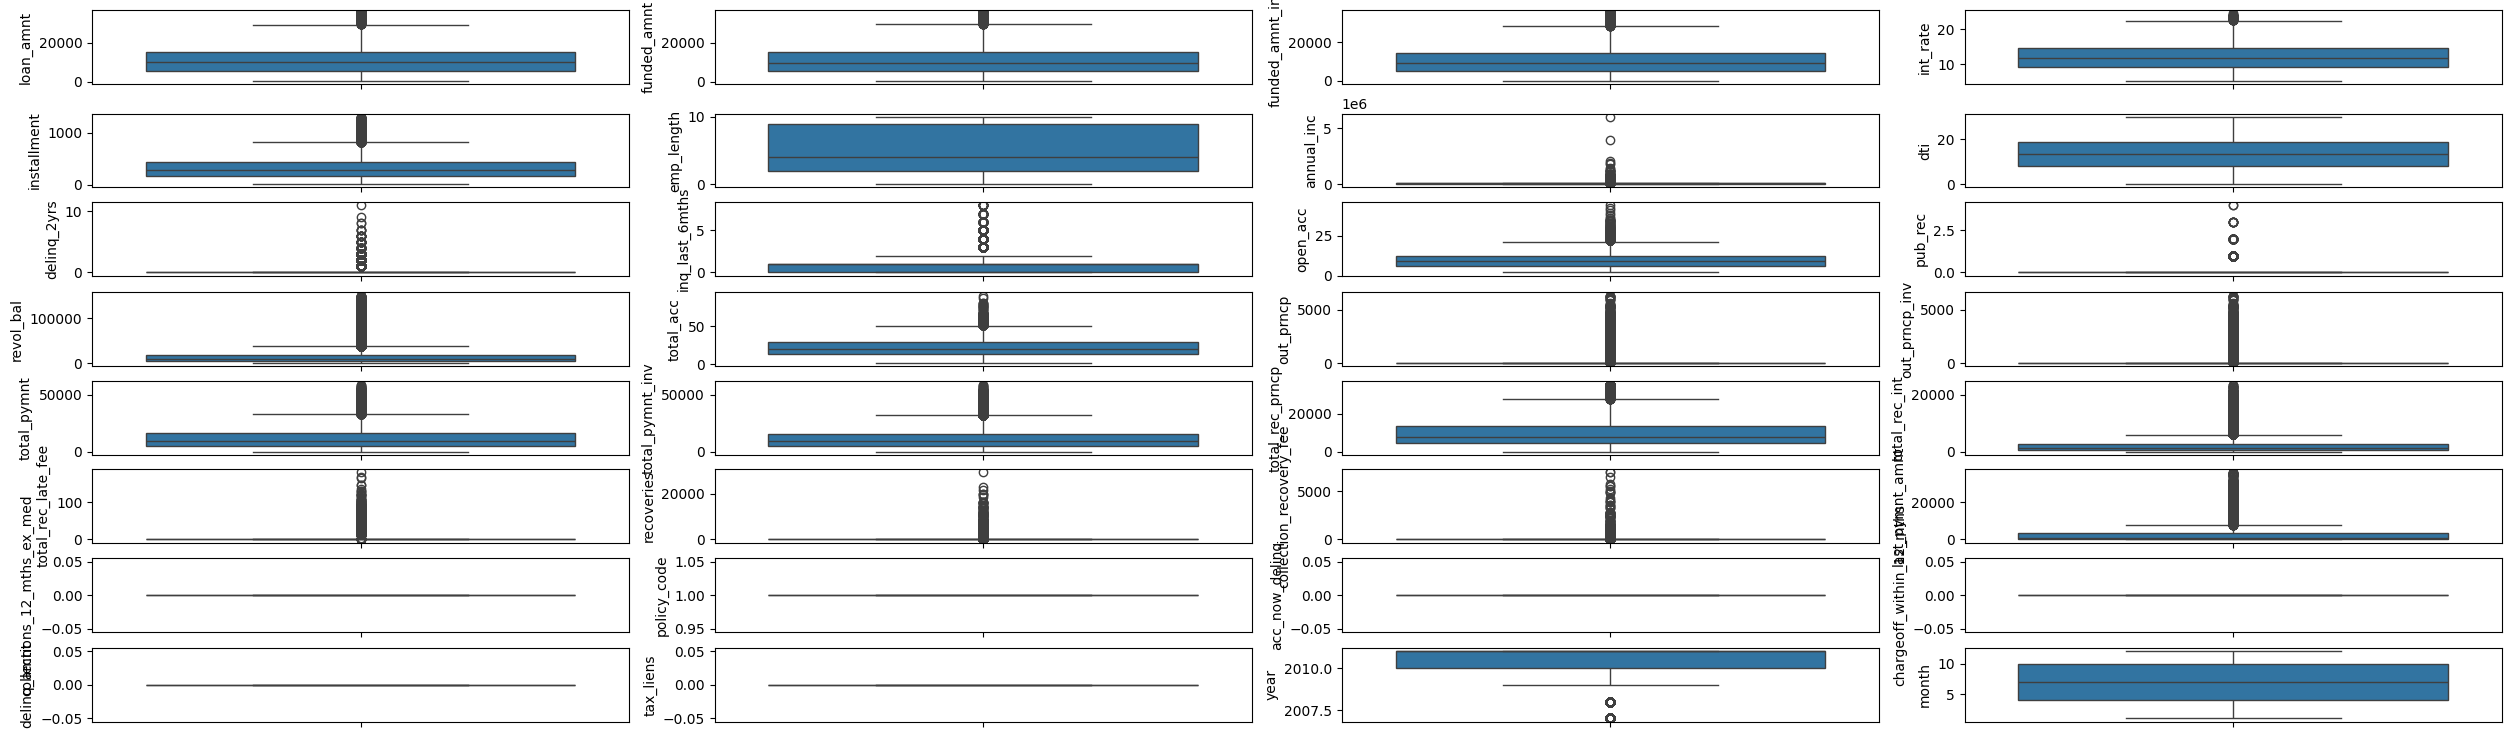

In [371]:
plt.figure(figsize=(25,25),layout='constrained')
plt.subplots_adjust()
ncols=4
nrows =len(num_cols)
for n,cols in enumerate(num_cols):
  ax=plt.subplot(nrows,ncols,n+1)
  sns.boxplot(dFtreated[cols],ax=ax)
plt.show()

#### Checking the distribution of the numeric columns using Distplot.

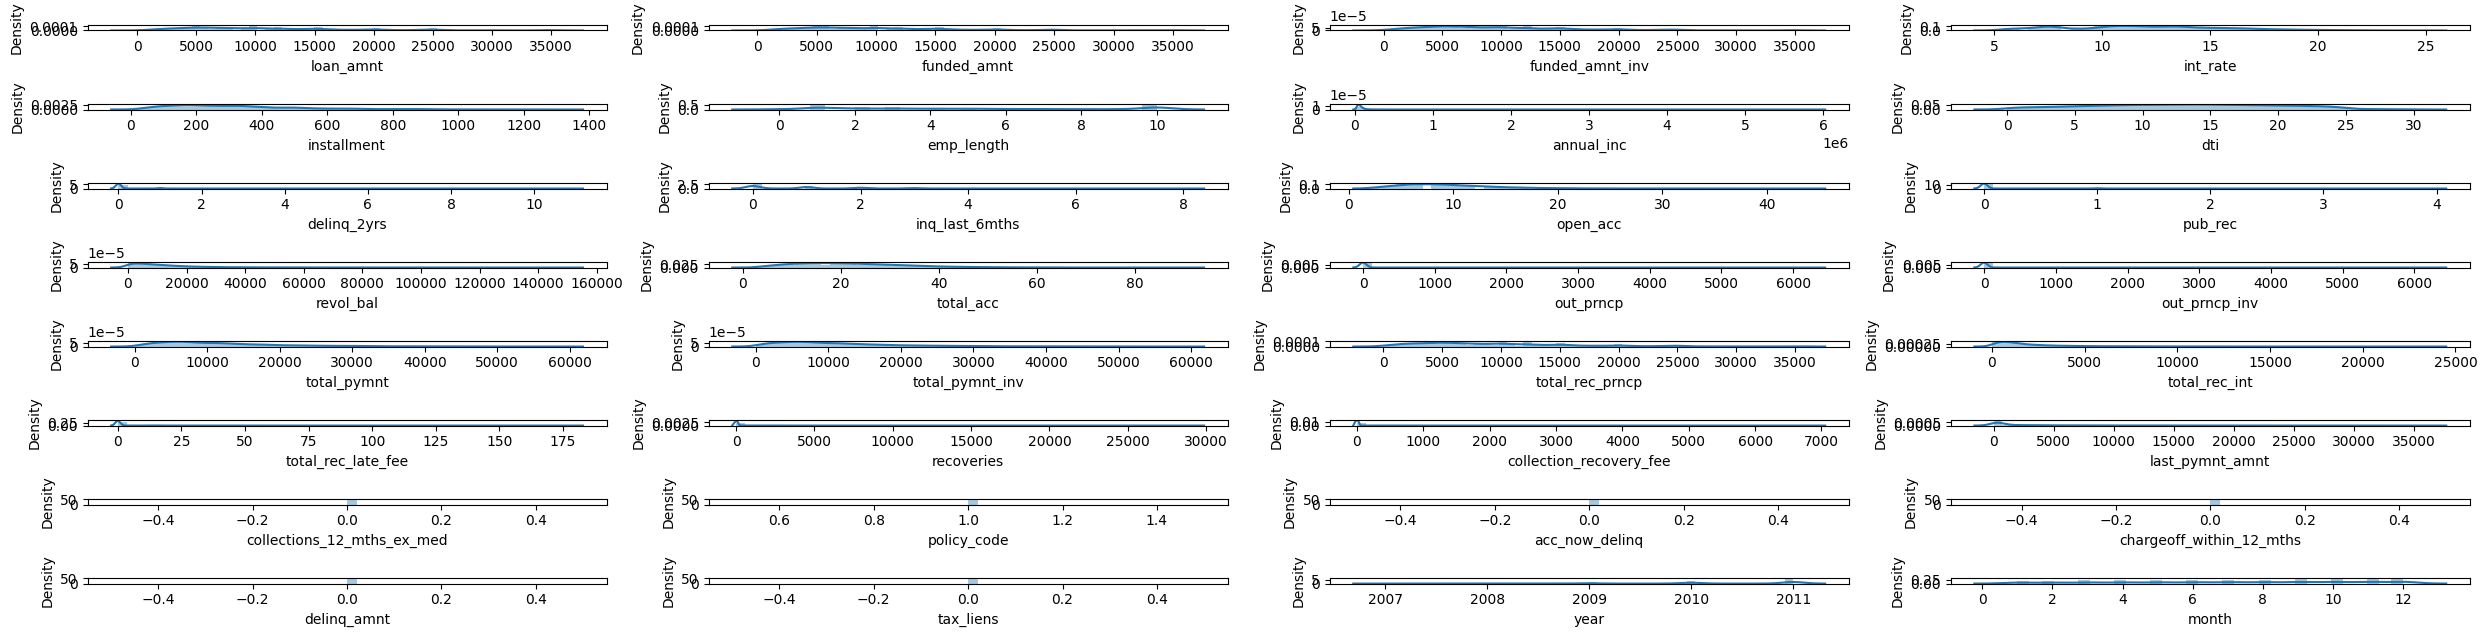

In [372]:
plt.figure(figsize=(25,25),layout='constrained')
ncols=4
nrows=len(num_cols)
n=1
for cols in num_cols:
  ax=plt.subplot(nrows,ncols,n)
  sns.distplot(dFtreated[cols],ax=ax)
  n=n+1
plt.tight_layout()
plt.show()

#### Loan Amount distribution using box plot and distribution plot.

count    39598.000000
mean     11235.869236
std       7457.703042
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

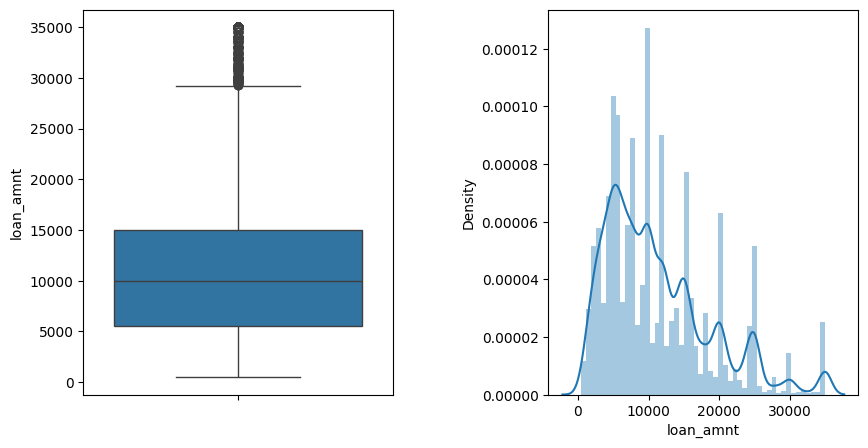

In [373]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,1)
sns.boxplot(dFtreated['loan_amnt'])
plt.subplot(1,2,2)
sns.distplot(dFtreated['loan_amnt'])
dFtreated['loan_amnt'].describe()


##### Average loan amount is around 11235.

#### Interest rate distribution

count    39598.000000
mean        12.019554
std          3.724607
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

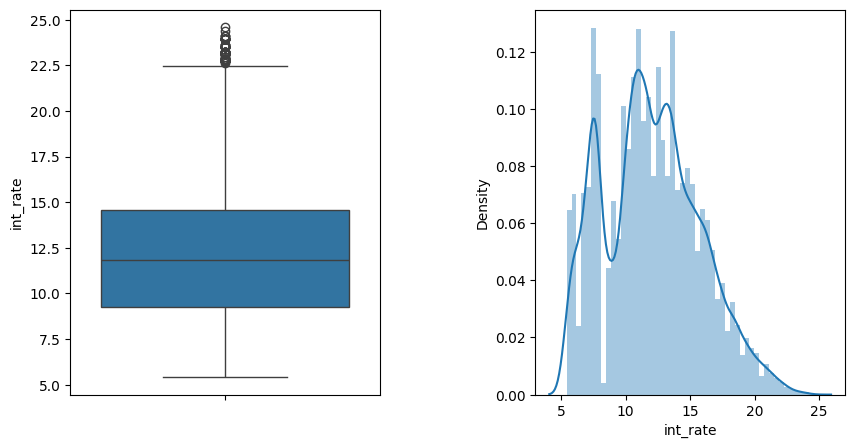

In [374]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,1)
sns.boxplot(dFtreated['int_rate'])
plt.subplot(1,2,2)
sns.distplot(dFtreated['int_rate'])
dFtreated['int_rate'].describe()

##### Average interest rate is around 12%

#### Total Amount distribution

count    39598.000000
mean     12172.477375
std       9044.928766
min          0.000000
25%       5585.321081
50%       9934.264743
75%      16563.389102
max      58563.679930
Name: total_pymnt, dtype: float64

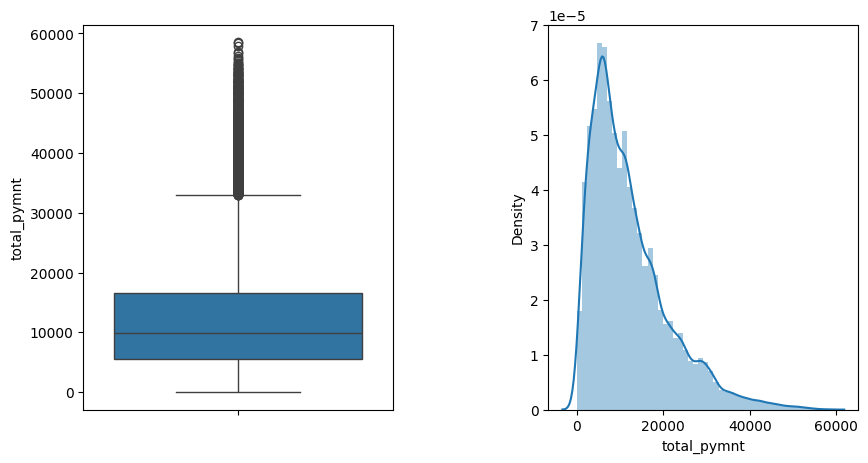

In [375]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,1)
sns.boxplot(dFtreated['total_pymnt'])
plt.subplot(1,2,2)
sns.distplot(dFtreated['total_pymnt'])
dFtreated['total_pymnt'].describe()

##### Average Total Amount is around 12172.

#### Annual Income distribution

count    3.959800e+04
mean     6.897712e+04
std      6.379785e+04
min      4.000000e+03
25%      4.056000e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

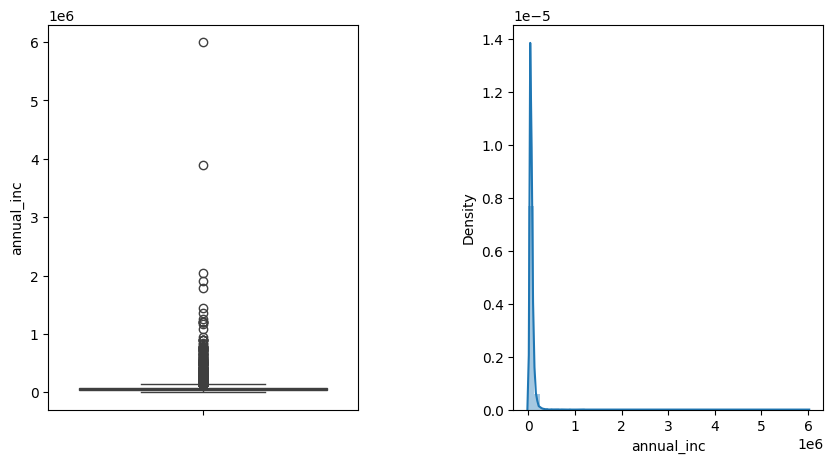

In [376]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,1)
sns.boxplot(dFtreated['annual_inc'])
plt.subplot(1,2,2)
sns.distplot(dFtreated['annual_inc'])
dFtreated['annual_inc'].describe()

##### Average Annual Income is around 69000.

## Outlier Treatment

### Removing outliers from the Annual Income column keep it at 95% quantile with boxplot and distribution plot.

(count     37611.000000
 mean      61049.976937
 std       27742.833274
 min        4000.000000
 25%       40000.000000
 50%       56000.000000
 75%       78000.000000
 max      140987.000000
 Name: annual_inc, dtype: float64,
 (37611, 52))

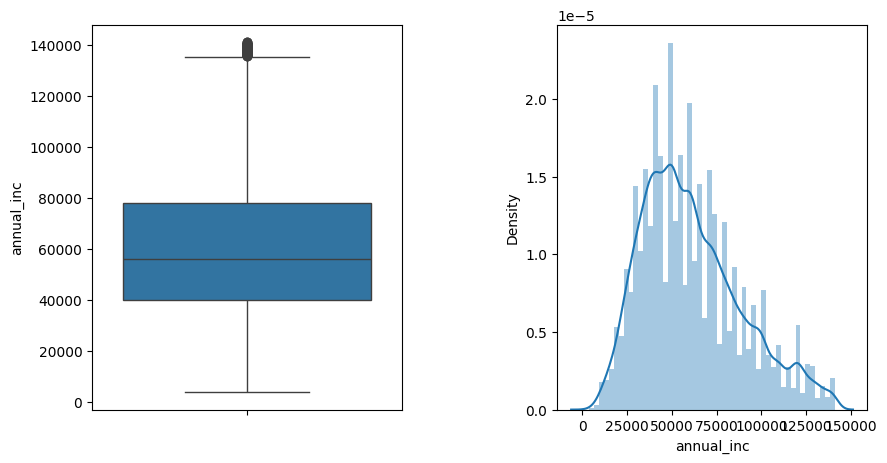

In [377]:
loan_df=dFtreated[dFtreated['annual_inc']<dFtreated ['annual_inc'].quantile(0.95)]
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,1)
sns.boxplot(loan_df['annual_inc'])
plt.subplot(1,2,2)
sns.distplot(loan_df['annual_inc'])
loan_df['annual_inc'].describe(),loan_df.shape

#### The mean value is 61049 and it falls under 50th and 75th quantile.

## Univariate Categorical Analysis

### Loan Status based on Category with plot graph

loan_status
Fully Paid     82.853421
Charged Off    14.344208
Current         2.802372
Name: count, dtype: float64

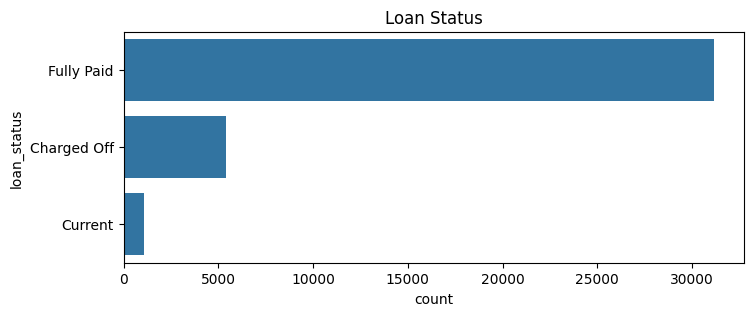

In [378]:
plt.figure(figsize=(8,3))
ax=sns.countplot(loan_df['loan_status'])
ax.set_title('Loan Status')
loan_df['loan_status'].value_counts()/len(loan_df)*100

#### Around 83% loan are fully paid, 14% are Charged off (delinquent) and 3% are Current.

### Loan Purpose based on Category with plot graph

purpose
debt_consolidation    47.403685
credit_card           12.940363
other                 10.090133
home_improvement       6.997953
major_purchase         5.517003
small_business         4.485390
car                    3.977560
wedding                2.422164
medical                1.722900
moving                 1.470315
vacation               0.978437
house                  0.930579
educational            0.808274
renewable_energy       0.255244
Name: count, dtype: float64

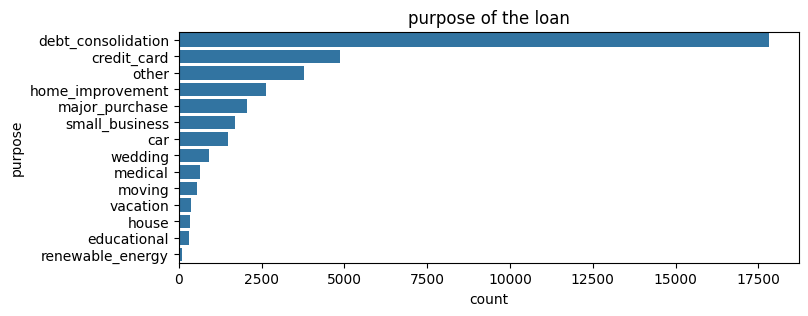

In [379]:
plt.figure(figsize=(8,3))
ax=sns.countplot(loan_df['purpose'],order=loan_df['purpose'].value_counts().index)
ax.set_title('purpose of the loan')
loan_df['purpose'].value_counts()/len(loan_df)*100

#### Top 5 Loan Purpose round off are as follows:
1. Debt_consolidation = 47%
2. credit_card = 13%
3. Other = 10%
4. home_improvement = 7%
5. major_purchase = 6%

### Home Ownership based on Category with plot graph

home_ownership
RENT        48.874000
MORTGAGE    43.123023
OWN          7.758369
OTHER        0.241950
NONE         0.002659
Name: count, dtype: float64

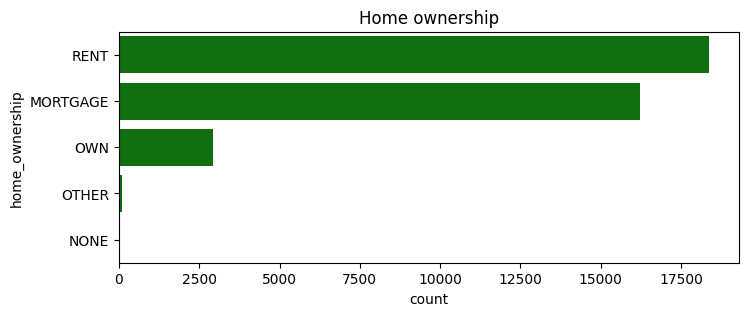

In [380]:
plt.figure(figsize=(8,3))
ax=sns.countplot(loan_df['home_ownership'],order=loan_df['home_ownership'].value_counts().index,color='green')
ax.set_title('Home ownership')
loan_df['home_ownership'].value_counts()/len(loan_df)*100

#### Top 3 Home Ownership round off are as follows:
1. Rent = 49%
2. Mortgage = 43%
3. Own = 8%

### Public record bankruptcies based on Category with plot graph

pub_rec_bankruptcies
0.0        94.015049
1.0         4.336497
unknown     1.632501
2.0         0.015953
Name: count, dtype: float64

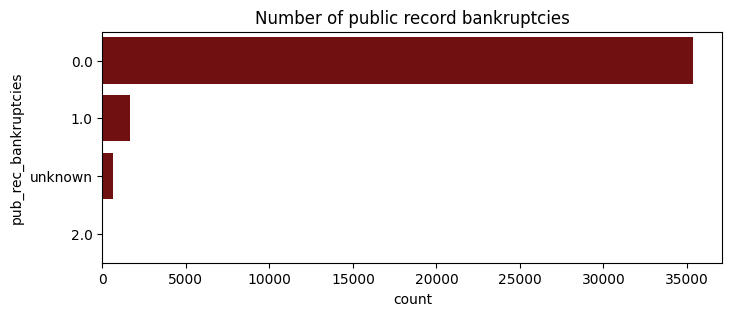

In [381]:
plt.figure(figsize=(8,3))
ax=sns.countplot(loan_df['pub_rec_bankruptcies'],order=loan_df['pub_rec_bankruptcies'].value_counts().index,color='Maroon')
ax.set_title('Number of public record bankruptcies')
loan_df['pub_rec_bankruptcies'].value_counts()/len(loan_df)*100

In [382]:
loan_df.shape

(37611, 52)

#### Close to 96% have 0 public record bankruptcies.

### LC Grade based on Category with plot graph

grade
B    30.328893
A    25.710563
C    20.486028
D    13.352477
E     6.904895
F     2.488634
G     0.728510
Name: count, dtype: float64

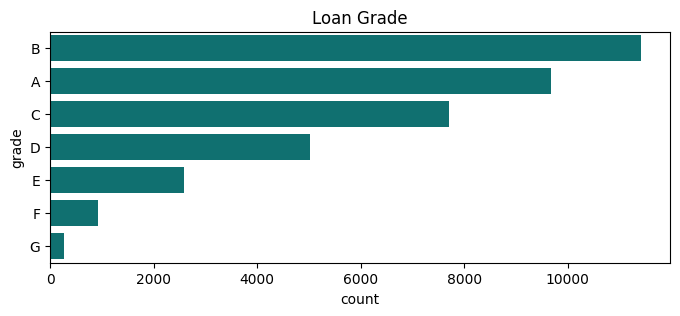

In [383]:
plt.figure(figsize=(8,3))
ax=sns.countplot(loan_df['grade'],order=loan_df['grade'].value_counts().index,color='Teal')
ax.set_title('Loan Grade')
loan_df['grade'].value_counts()/len(loan_df)*100

#### Top 3 LC Grade category are as follows:
1. B = 30%
2. A = 26%
3. C = 20%



#### Pie Chart representing Loan Status

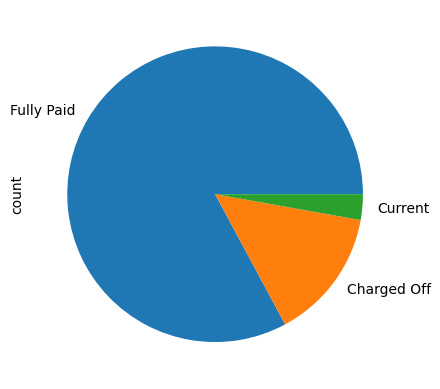

In [384]:
loan_df["loan_status"].value_counts().plot.pie()
plt.show()

In [385]:
loan_df.title.nunique()#no need to check of tittle as there are a lot of unique values

18713

## Bivariate Analysis

### What is ratio between loan amount and funded amount >=10000.

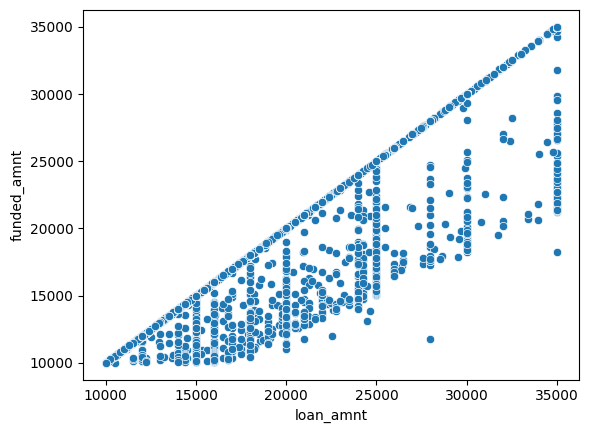

In [386]:
loan_df0 = loan_df[(loan_df.funded_amnt >=10000)]
sns.scatterplot(data=loan_df0, x='loan_amnt', y='funded_amnt')
plt.show()

##### From above scatter plot we noticed:
* Loan amount and Funding are not equal.
* Most likely Customers with lower loan amount to receive higher funding (within the loan amount).

### What is the Reaggregation between Funded amount and Annual Income.

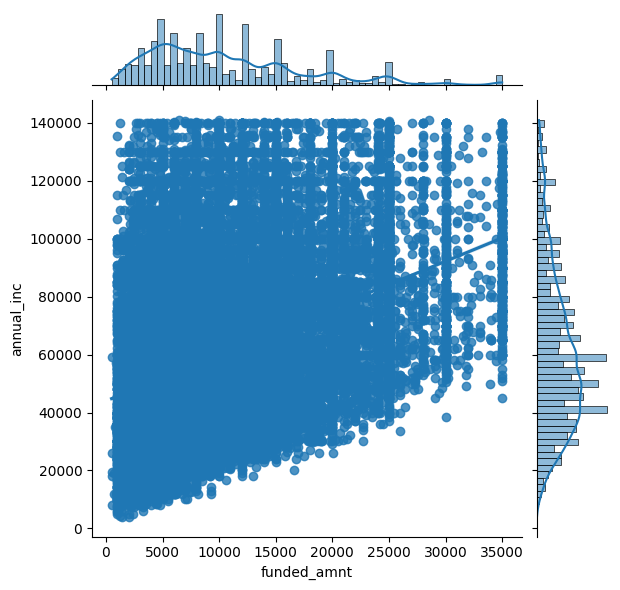

In [387]:
sns.jointplot(data=loan_df, x='funded_amnt', y='annual_inc', kind="reg")
plt.show()

#### Seems like the higher the income lower is customer opting for loan.

### What is the minimum estimator of loan amount and customer grade?

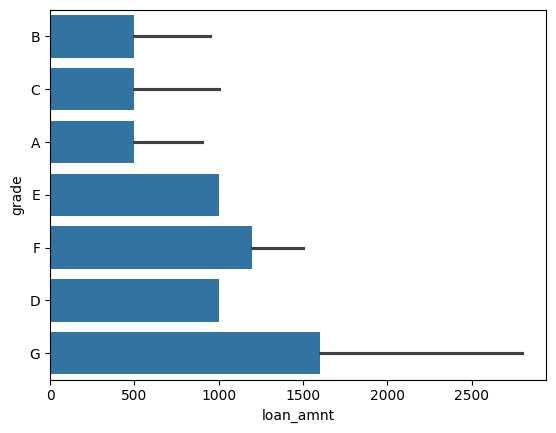

In [388]:
sns.barplot(data=loan_df, x='loan_amnt', y='grade', estimator=np.min)
plt.show()

#### Seems like Grade G customers has highest minimum estimator.

### What is loan amount wherein we see most defaulters.

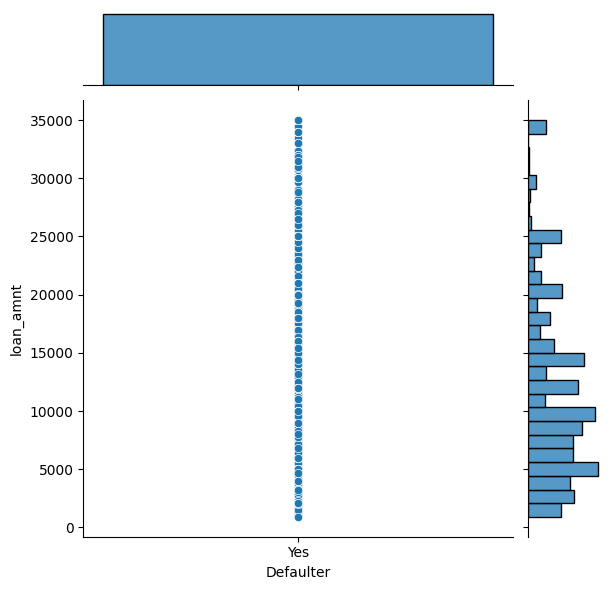

In [389]:
loan_df1 = loan_df[(loan_df.Defaulter == 'Yes')]
sns.jointplot(data=loan_df1, x='Defaulter', y='loan_amnt')
plt.show()

##### From above joint plot we noticed:
* The correction between Loan amount and Defaulters is picked at 5000, 10000 and 15000.

### What is Loan Acceptance chances in listed Customers?

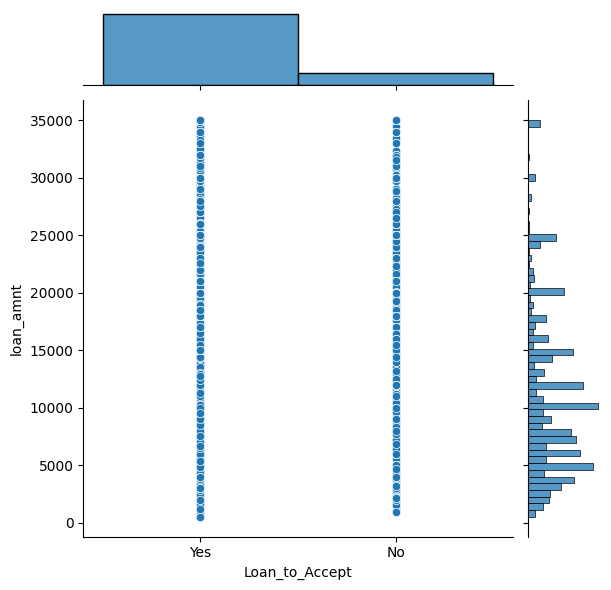

In [390]:
sns.jointplot(data=loan_df, x='Loan_to_Accept', y='loan_amnt')
plt.show()

#### From above joint plot we noticed:
* We noticed higher acceptance compared to rejection.

### What is the correlation of funded amount every month on yearly basis?

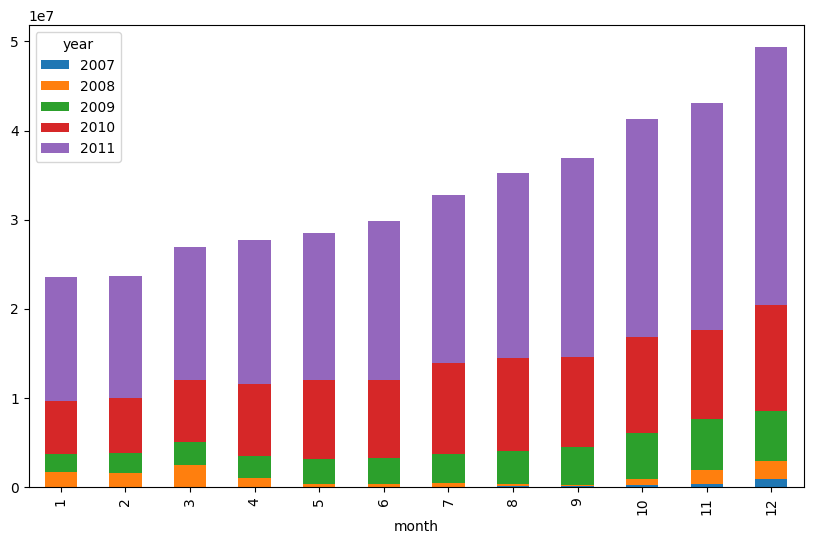

In [391]:
Monthly = pd.pivot_table(data=loan_df, values='funded_amnt', index='month', columns='year', aggfunc=sum)
Monthly.plot(kind="bar", stacked="True", figsize=[10,6])
plt.show()

#### From above stacked bar plot we noticed: Year on year on monthly basis funding amount has been increasing.

### What is highest and lowest funding on monthly basis?

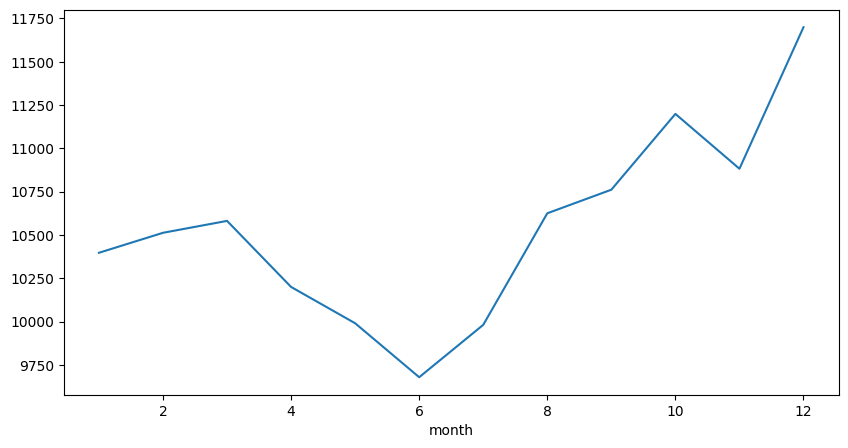

In [392]:
plt.figure(figsize=[10,5])
loan_df.groupby(['month'])['funded_amnt'].mean().plot()
plt.show()

#### From above Line plot we noticed: Funding is highest in December and lowest in June.

### Selecting Columns for Heap Map

In [393]:
loan_df2 = dFtreated[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'year','month']]

### Heat map showing the correlation with all number columns extracted from the main data source.

<Axes: >

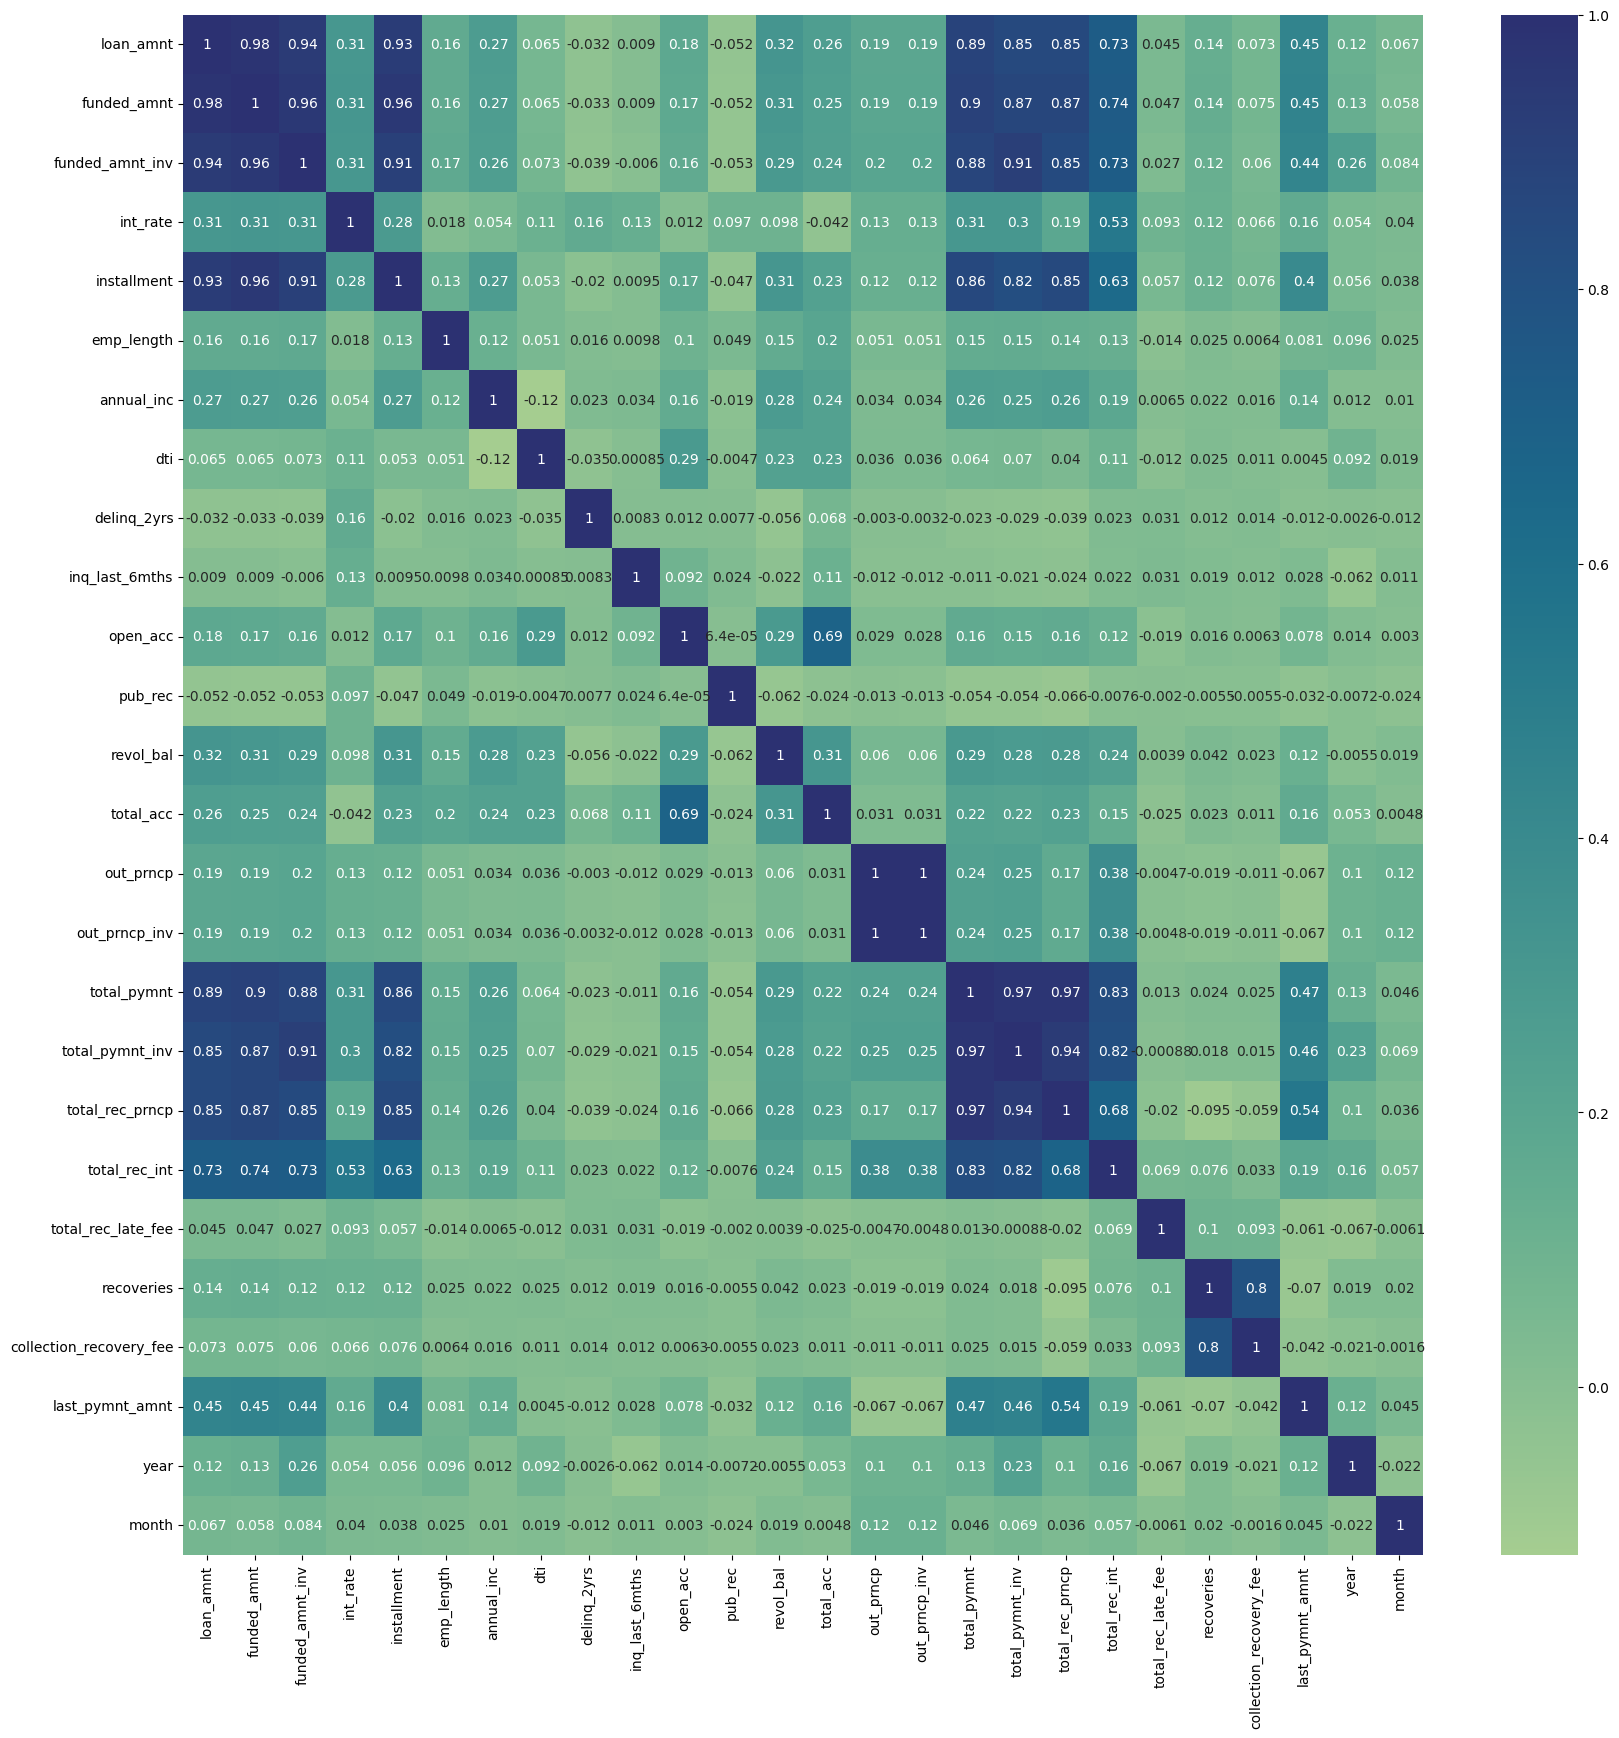

In [394]:
plt.figure(figsize=(20,20),layout='constrained')
plt.tight_layout()
sns.heatmap(loan_df2.corr(),annot=True,cmap='crest')#,loan_df2.corr()

### Plot graph showing term, grade, home_ownership, verification_status, purpose, pub_rec_bankruptcies, pub_rec in hue with loan status

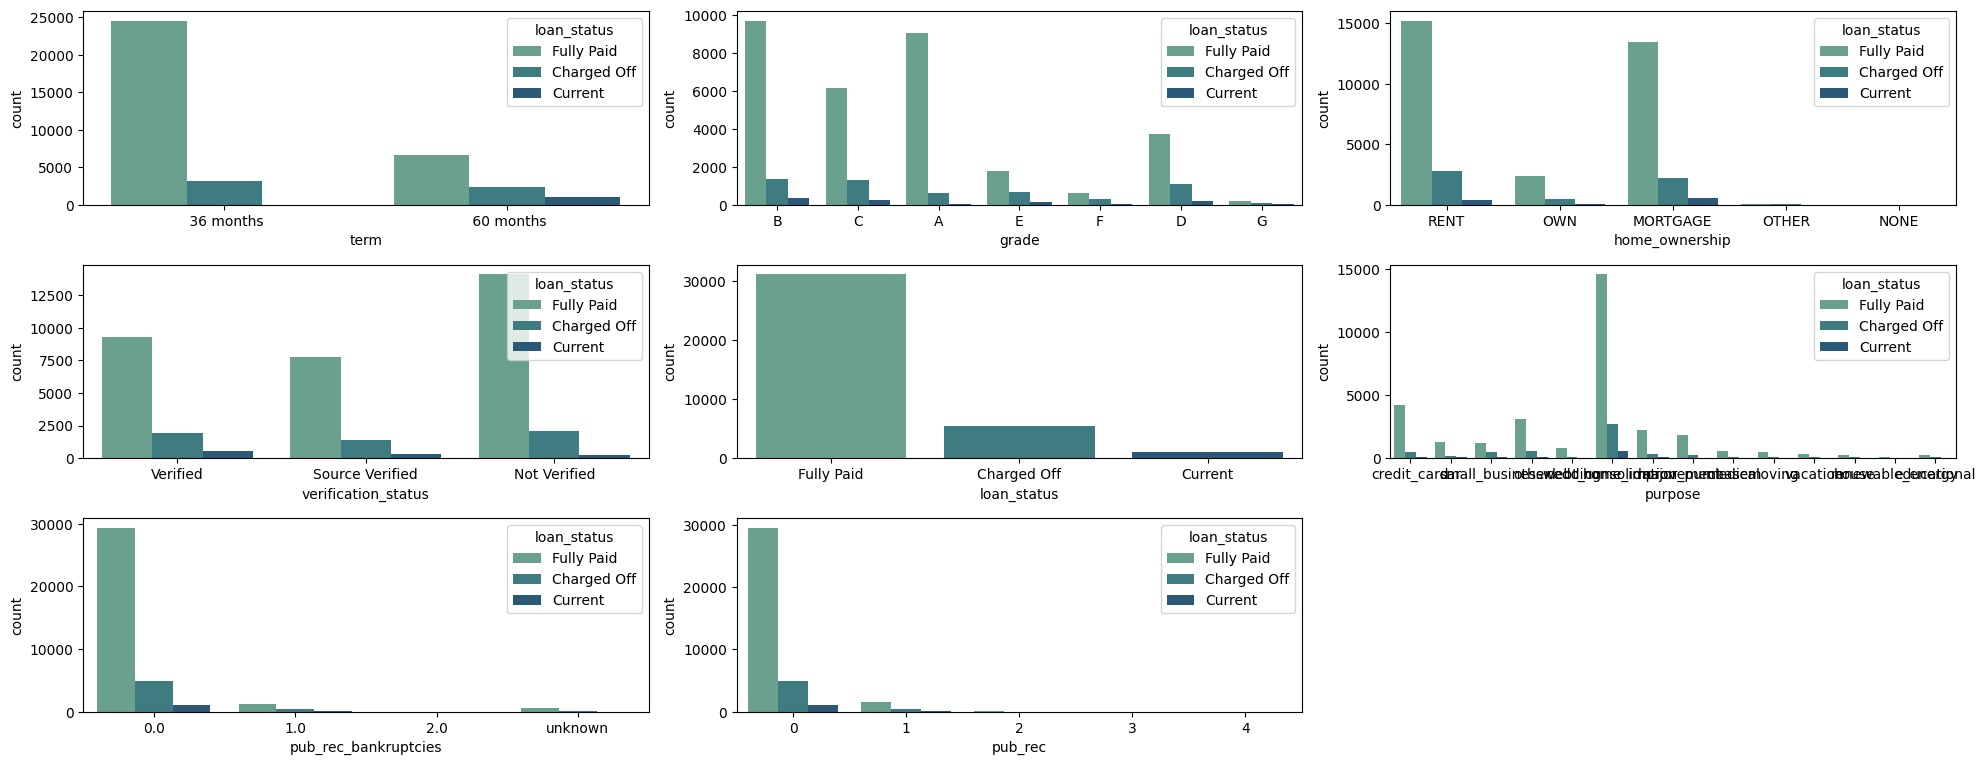

In [395]:
plt.figure(figsize=(20,20),layout='constrained')
cat_cols=['term', 'grade', 'home_ownership',
        'verification_status', 'loan_status', 'purpose',
        'pub_rec_bankruptcies','pub_rec']
ncols=3
nrows=len(cat_cols)
n=1
for cols in cat_cols:
  ax=plt.subplot(nrows,ncols,n)
  sns.countplot(x=loan_df[cols],data=loan_df,hue='loan_status',palette='crest',ax=ax)
  n=n+1
plt.tight_layout()


### Loan taken What purpose has higher charge off?

loan_status,purpose,Charged Off,Current,Fully Paid,total,perc_charged_off
0,car,158.0,50.0,1288.0,1496.0,10.561497
1,credit_card,518.0,97.0,4252.0,4867.0,10.643107
2,debt_consolidation,2670.0,548.0,14611.0,17829.0,14.975602
3,educational,54.0,0.0,250.0,304.0,17.763158
4,home_improvement,317.0,82.0,2233.0,2632.0,12.044073
5,house,55.0,12.0,283.0,350.0,15.714286
6,major_purchase,216.0,35.0,1824.0,2075.0,10.409639
7,medical,103.0,9.0,536.0,648.0,15.895062
8,moving,90.0,7.0,456.0,553.0,16.274864
9,other,601.0,116.0,3078.0,3795.0,15.836627


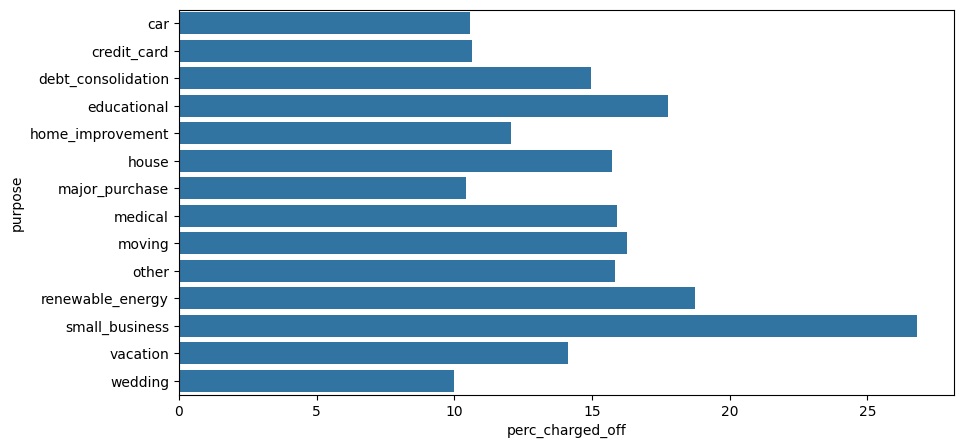

In [396]:
df_purpose=loan_df.groupby(['purpose','loan_status'])['loan_status'].count().unstack().fillna(0).reset_index()
df_purpose
df_purpose['total']=df_purpose['Charged Off']+df_purpose['Fully Paid']+df_purpose['Current']
df_purpose['perc_charged_off']=df_purpose['Charged Off']/df_purpose['total']*100

plt.figure(figsize=(10,5))
sns.barplot(x='perc_charged_off',y='purpose',data=df_purpose)
df_purpose

#### Loan taken for small business purposes see higher charge off.

### What is loan application with higher charge off percentage?

<Axes: xlabel='perc_charged_off', ylabel='grade'>

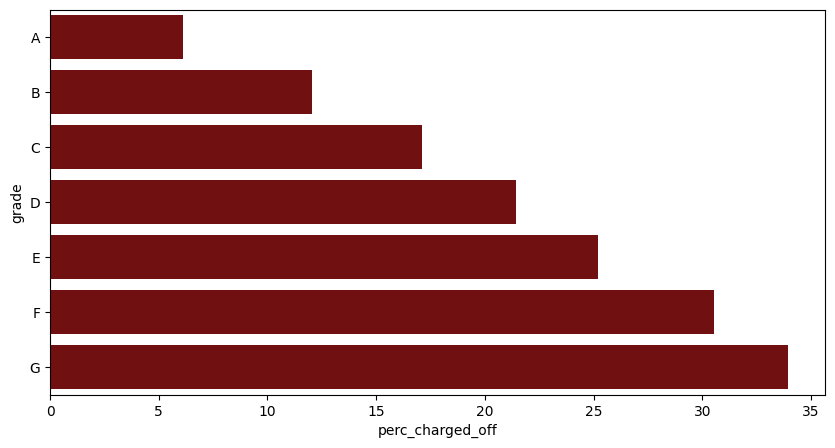

In [397]:
df_grade=loan_df.groupby(['grade','loan_status'])['loan_status'].count().unstack().fillna(0).reset_index()
df_grade
df_grade['total']=df_grade['Charged Off']+df_grade['Fully Paid']+df_grade['Current']
df_grade['perc_charged_off']=df_grade['Charged Off']/df_grade['total']*100
df_grade
plt.figure(figsize=(10,5))
sns.barplot(x='perc_charged_off',y='grade',data=df_grade,color='Maroon')

#### Loan application with Grade G has higher charge off percentage

### Which state has significantly higher charge off percentage?

loan_status,addr_state,Charged Off,Current,Fully Paid,total,perc_charged_off
0,AK,13.0,2.0,58.0,73.0,17.808219
1,AL,51.0,16.0,371.0,438.0,11.643836
2,AR,26.0,10.0,202.0,238.0,10.924370
3,AZ,116.0,27.0,690.0,833.0,13.925570
4,CA,1071.0,135.0,5480.0,6686.0,16.018546
5,CO,96.0,26.0,642.0,764.0,12.565445
6,CT,91.0,23.0,580.0,694.0,13.112392
7,DC,13.0,3.0,181.0,197.0,6.598985
8,DE,11.0,1.0,97.0,109.0,10.091743
9,FL,484.0,80.0,2163.0,2727.0,17.748442


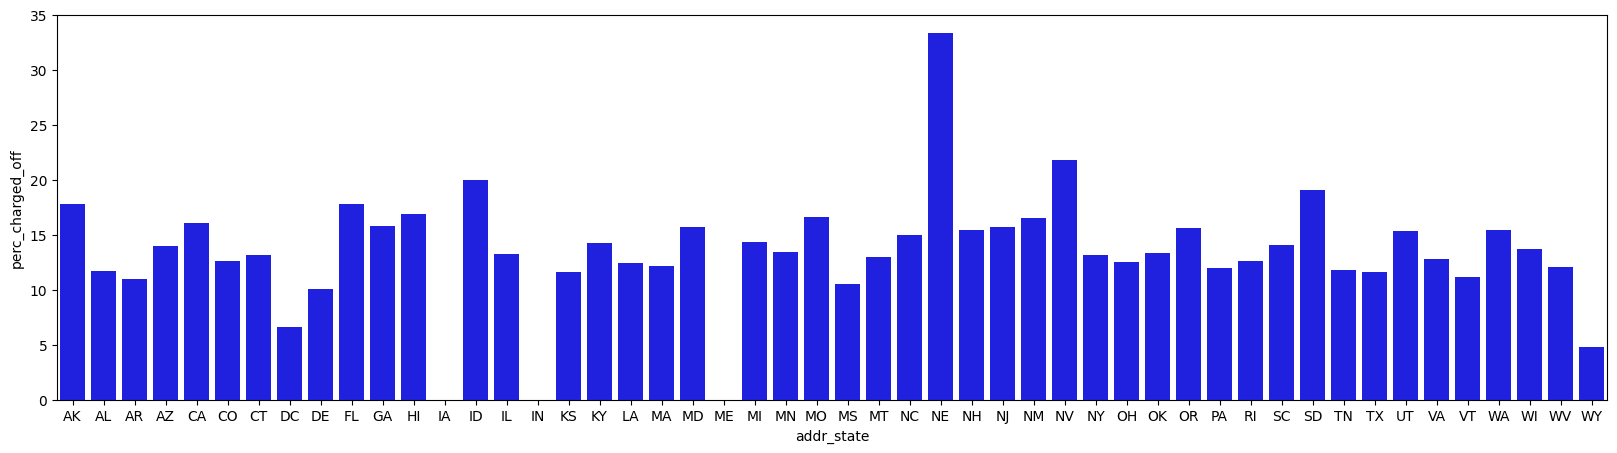

In [398]:
df_addr=loan_df.groupby(['addr_state','loan_status'])['loan_status'].count().unstack().fillna(0).reset_index()

#plotting the graphs
df_addr['total']=df_addr['Charged Off']+df_addr['Fully Paid']+df_addr['Current']
df_addr['perc_charged_off']=df_addr['Charged Off']/df_addr['total']*100
df_addr
plt.figure(figsize=(20,5))
sns.barplot(x='addr_state',y='perc_charged_off',data=df_addr,color='blue'),
df_addr

#### NV(Nevada) state has significantly higher charge off percentage and NE(Nebraska)'s higher charge off due to lower total.

### Which customers are with higher public bankruptcies charge off percentage?

loan_status,pub_rec_bankruptcies,Charged Off,Current,Fully Paid,total,perc_charged_off
0,0.0,4924.0,1018.0,29418.0,35360.0,13.925339
1,1.0,360.0,35.0,1236.0,1631.0,22.072348
2,2.0,2.0,1.0,3.0,6.0,33.333333
3,unknown,109.0,0.0,505.0,614.0,17.752443


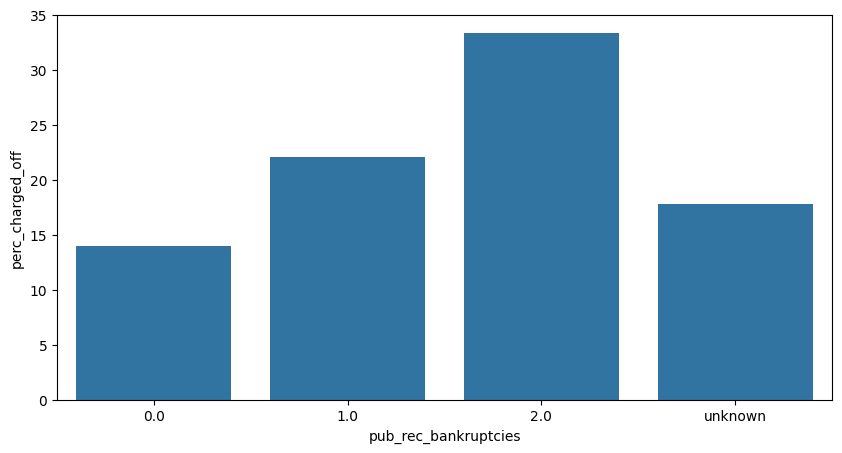

In [399]:
df_br_rec=loan_df.groupby(['pub_rec_bankruptcies','loan_status'])['loan_status'].count().unstack().fillna(0).reset_index()

#plotting the graphs
df_br_rec['total']=df_br_rec['Charged Off']+df_br_rec['Fully Paid']+df_br_rec['Current']
df_br_rec['perc_charged_off']=df_br_rec['Charged Off']/df_br_rec['total']*100
df_br_rec
plt.figure(figsize=(10,5))
sns.barplot(x='pub_rec_bankruptcies',y='perc_charged_off',data=df_br_rec,),
df_br_rec

#### Customers with 2 public bankruptcies have higher charge off percentage.

### Converting the continuous columns into bins for easier analysis

#### Numeric variables with loan status

In [400]:
loan_df['loan_amnt_cats'] = pd.cut(loan_df['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])
loan_df['annual_inc_cats'] = pd.cut(loan_df['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])
loan_df['int_rate_cats'] = pd.cut(loan_df['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])
loan_df['dti_cats'] = pd.cut(loan_df['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])
loan_df['open_acc_cats']=pd.cut(loan_df['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

### What is the highest interest rate against the Percentage Charged Off?

loan_status,int_rate_cats,Charged Off,Current,Fully Paid,total,perc_charged_off
0,0-10,811,75,10986,11872,6.831199
1,10-13,1189,255,7695,9139,13.010176
2,12.5-16,1944,311,8956,11211,17.340112
3,16 +,1185,331,3120,4636,25.560828


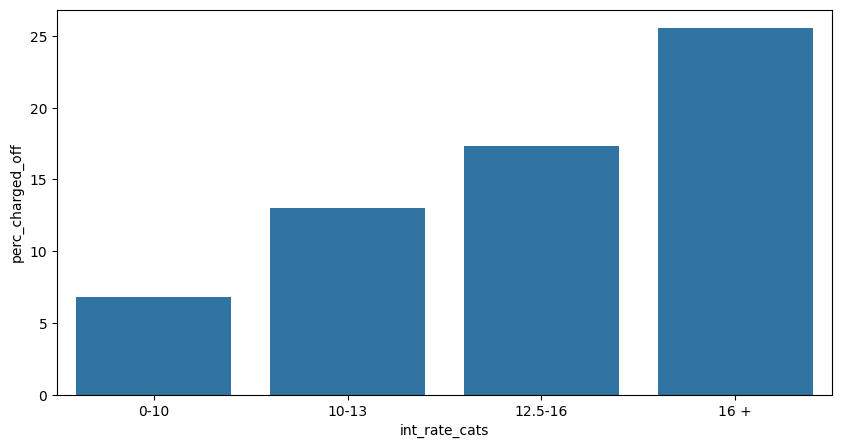

In [401]:
df_intrate=loan_df.groupby(['int_rate_cats','loan_status'])['loan_status'].count().unstack().fillna(0).reset_index()

#plotting the graphs
df_intrate['total']=df_intrate['Charged Off']+df_intrate['Fully Paid']+df_intrate['Current']
df_intrate['perc_charged_off']=df_intrate['Charged Off']/df_intrate['total']*100
df_intrate
plt.figure(figsize=(10,5))
sns.barplot(x='int_rate_cats',y='perc_charged_off',data=df_intrate,),
df_intrate

#### Its 16%+ against 25% Charged off customers.

### What is the highest Annual income Category against the Percentage Charged Off?

loan_status,annual_inc_cats,Charged Off,Current,Fully Paid,total,perc_charged_off
0,0-20000,233,9,927,1169,19.931565
1,20000-40000,1503,170,6980,8653,17.369698
2,40000-60000,1725,345,9518,11588,14.886089
3,60000-80000,1021,240,6586,7847,13.011342
4,80000 +,913,290,7151,8354,10.928896


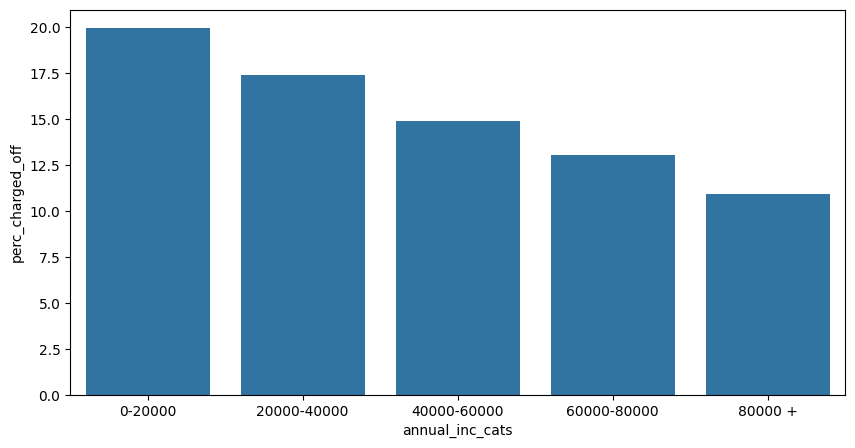

In [402]:
df_anninc=loan_df.groupby(['annual_inc_cats','loan_status'])['loan_status'].count().unstack().fillna(0).reset_index()

#plotting the graphs
df_anninc['total']=df_anninc['Charged Off']+df_anninc['Fully Paid']+df_anninc['Current']
df_anninc['perc_charged_off']=df_anninc['Charged Off']/df_anninc['total']*100
df_anninc
plt.figure(figsize=(10,5))
sns.barplot(x='annual_inc_cats',y='perc_charged_off',data=df_anninc,),
df_anninc
#customers with 2 public bankruptcies have higher charge off percentage

#### Its 0 to 20000 against 20% Charged off customers.

### What is the average variations for the all the imp numeric columns?

<Axes: xlabel='term', ylabel='int_rate'>

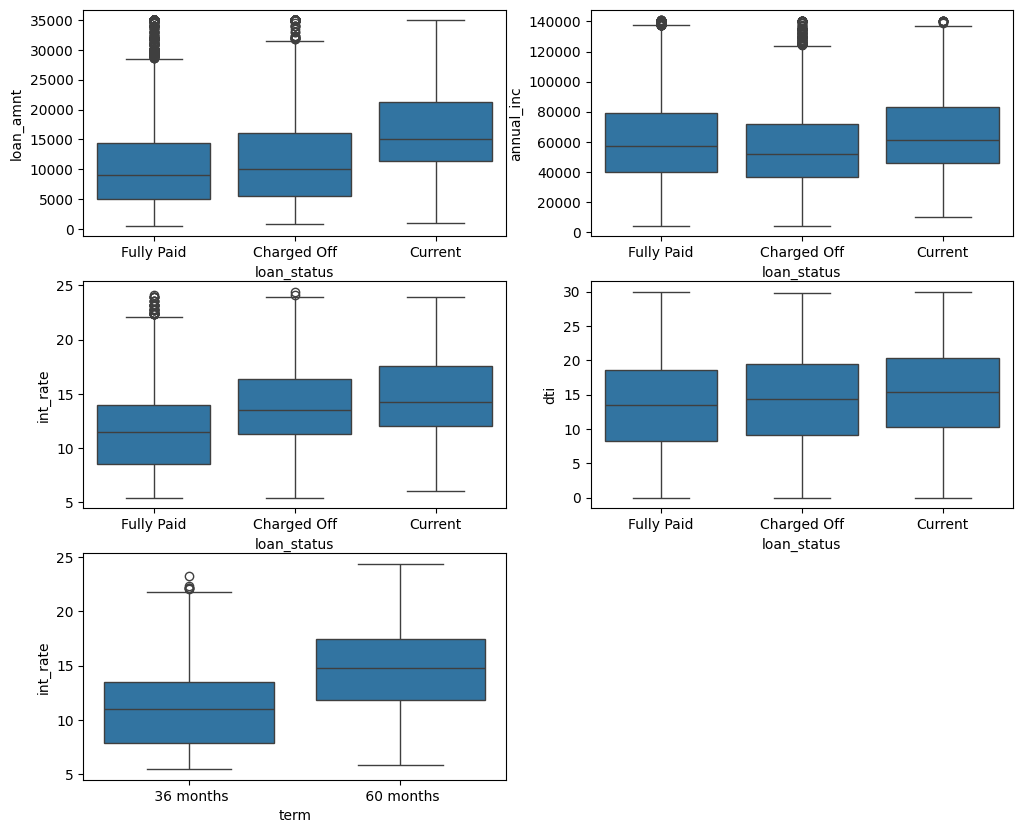

In [403]:
ax,fig=plt.subplots(1,2,figsize=(12,10))
plt.subplot(3,2,1)
sns.boxplot(x='loan_status',y='loan_amnt',data=loan_df)
plt.subplot(3,2,2)
sns.boxplot(x='loan_status',y='annual_inc',data=loan_df)
plt.subplot(3,2,3)
sns.boxplot(x='loan_status',y='int_rate',data=loan_df)
plt.subplot(3,2,4)
sns.boxplot(x='loan_status',y='dti',data=loan_df)
plt.subplot(3,2,5)
sns.boxplot(x='term',y='int_rate',data=loan_df)

#### No huge variations in the averages for the all the imp numeric column

### For what purpose higher loan amount is taken?

<Axes: xlabel='loan_amnt', ylabel='purpose'>

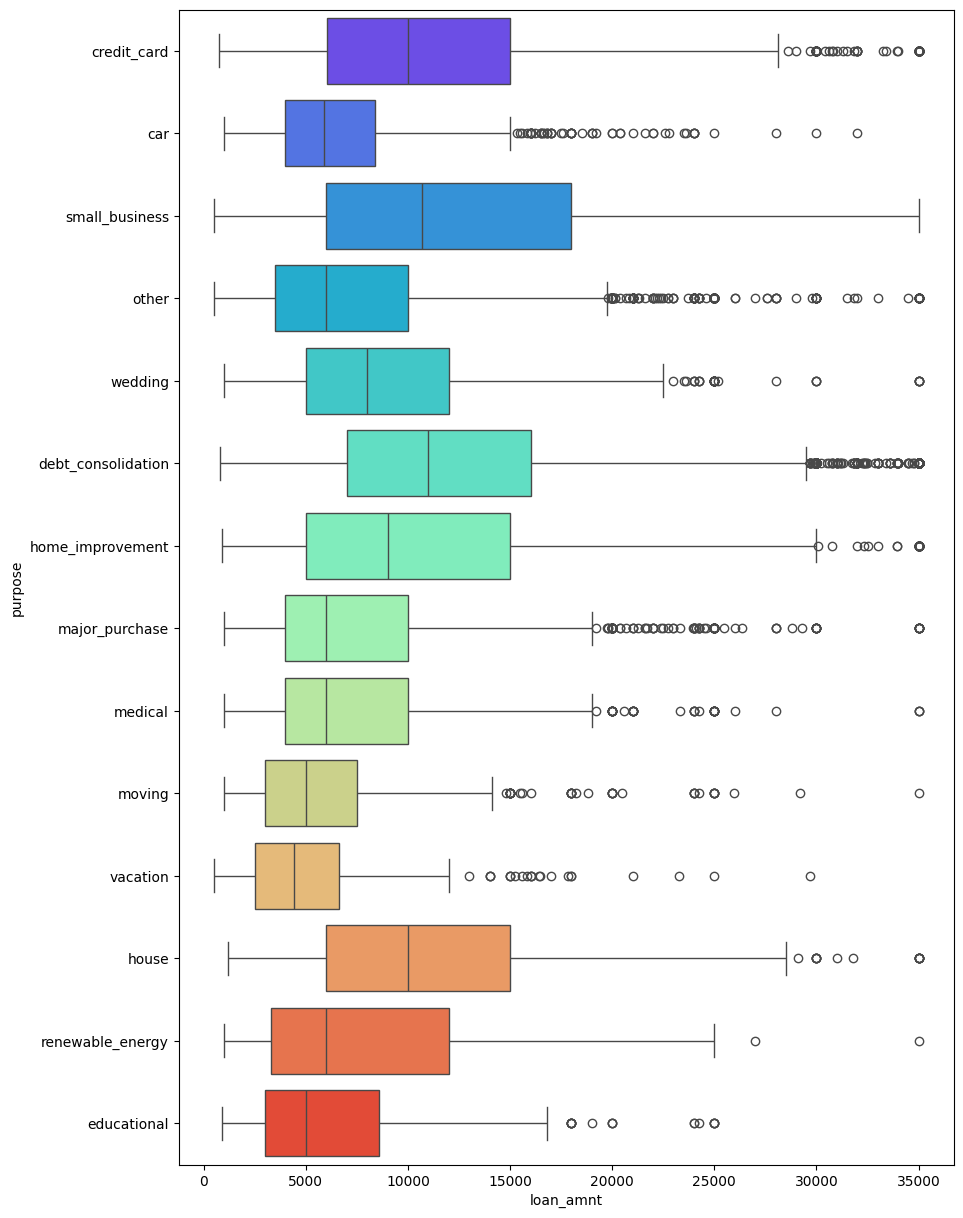

In [404]:
plt.figure(figsize=(10,15))
sns.boxplot(x='loan_amnt',y='purpose',data=loan_df,palette='rainbow')
#small business purpose has higher average loan amount

#### For small business purpose has higher average loan amount.

### For what purpose highest interest rate is charged?

<Axes: xlabel='int_rate', ylabel='purpose'>

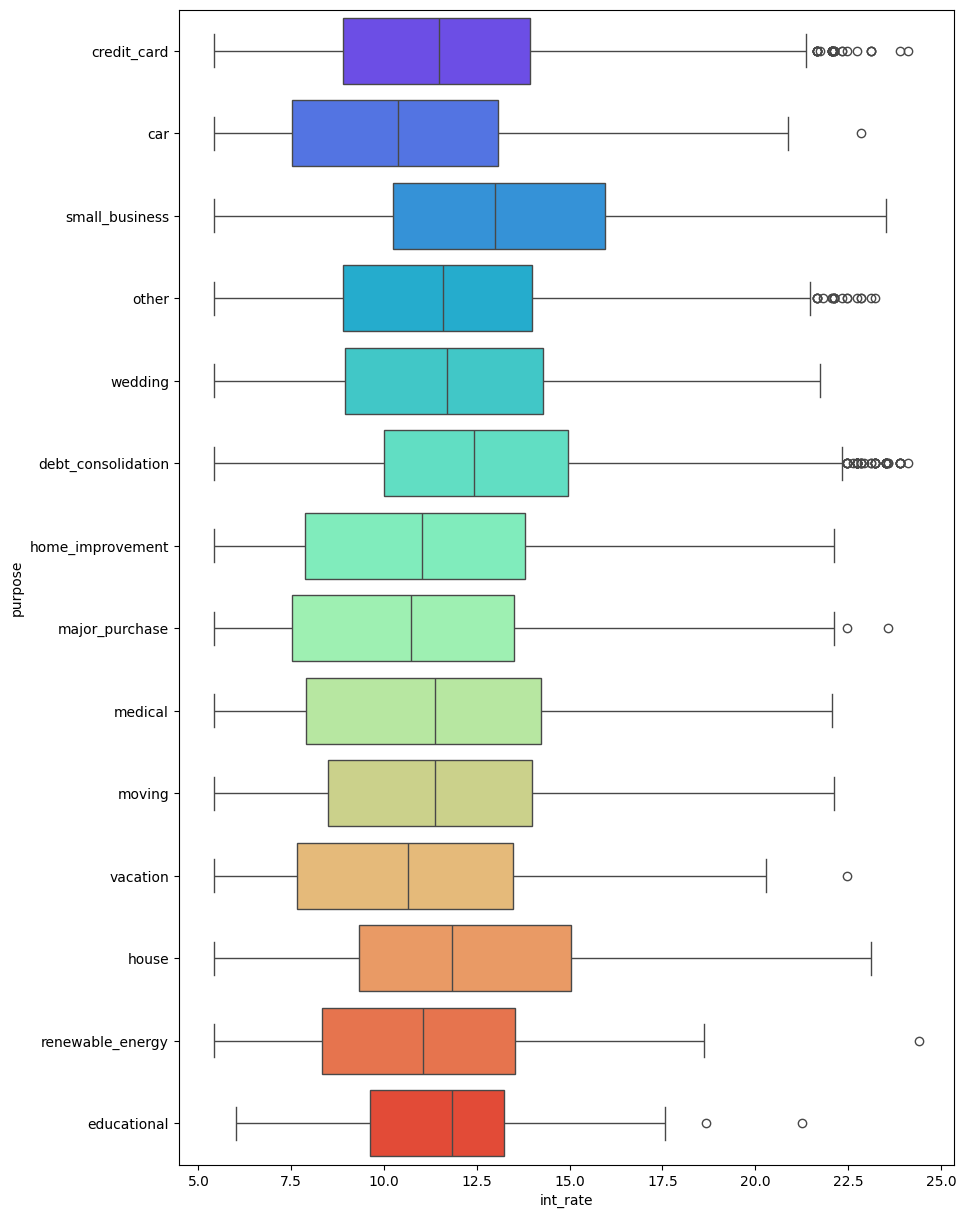

In [405]:
plt.figure(figsize=(10,15))
sns.boxplot(x='int_rate',y='purpose',data=loan_df,palette='rainbow')
#small business purpose has higher int rate

#### For small business purpose has higher average loan amount.

### What is the highest range under which accounts are opened against Loan Status?

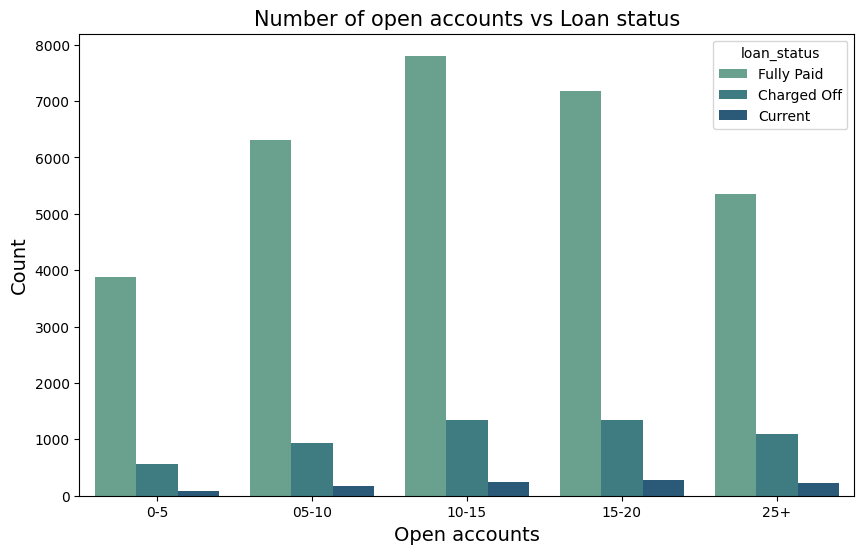

In [406]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x='open_acc_cats' ,hue="loan_status", data=loan_df,palette='crest')
ax.set_title('Number of open accounts vs Loan status',fontsize=15)
ax.set_ylabel('Count',fontsize=14)
ax.set_xlabel('Open accounts',fontsize=14)
plt.show()

loan_status,open_acc_cats,Charged Off,Current,Fully Paid,total,perc_charged_off
0,0-5,558,79,3870,4507,12.380741
1,05-10,942,170,6304,7416,12.702265
2,10-15,1339,242,7803,9384,14.268968
3,15-20,1342,273,7169,8784,15.277778
4,25+,1100,232,5352,6684,16.457211


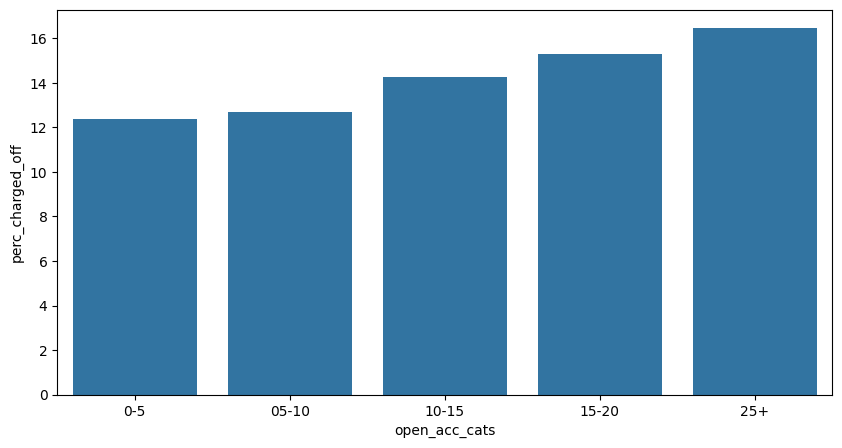

In [407]:
df_opacc=loan_df.groupby(['open_acc_cats','loan_status'])['loan_status'].count().unstack().fillna(0).reset_index()

#plotting the graphs
df_opacc['total']=df_opacc['Charged Off']+df_opacc['Fully Paid']+df_opacc['Current']
df_opacc['perc_charged_off']=df_opacc['Charged Off']/df_opacc['total']*100
df_opacc
plt.figure(figsize=(10,5))
sns.barplot(x='open_acc_cats',y='perc_charged_off',data=df_opacc,),
df_opacc
#customers with 25+ open accounts have higher charge off percentage

#### 10 to 15 highest range under which accounts are opened against Fully Paid Loan status.

### What is the highest range under Employement Length opened against Loan Status?

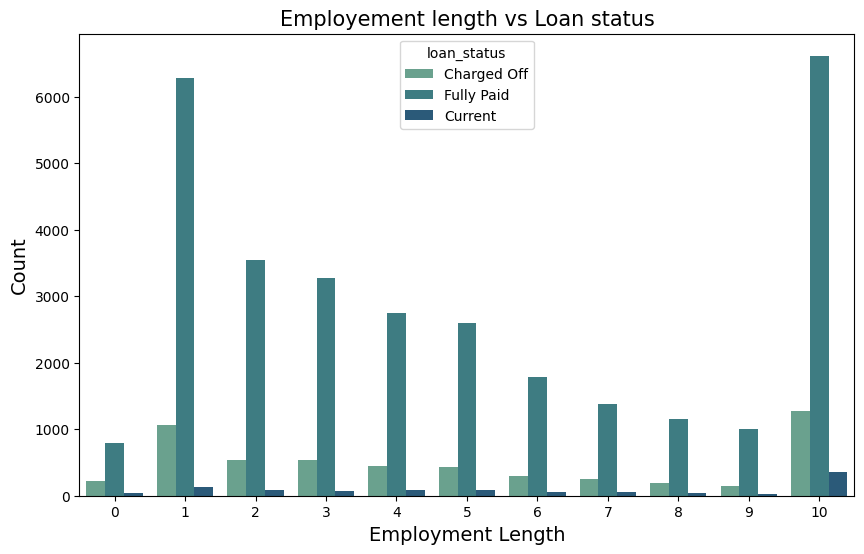

In [408]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x='emp_length' ,hue="loan_status", data=loan_df,palette='crest')
ax.set_title('Employement length vs Loan status',fontsize=15)
ax.set_ylabel('Count',fontsize=14)
ax.set_xlabel('Employment Length',fontsize=14)
plt.show()

#### Highest Loans are taken in the 10th year followed by 1st year.

loan_status,emp_length,Charged Off,Current,Fully Paid,total,perc_charged_off
0,0,223,41,787,1051,21.217888
1,1,1056,135,6273,7464,14.147910
2,2,544,91,3547,4182,13.008130
3,3,536,76,3280,3892,13.771840
4,4,441,90,2748,3279,13.449222
5,5,439,81,2598,3118,14.079538
6,6,292,57,1778,2127,13.728256
7,7,252,58,1386,1696,14.858491
8,8,193,40,1149,1382,13.965268
9,9,150,31,1001,1182,12.690355


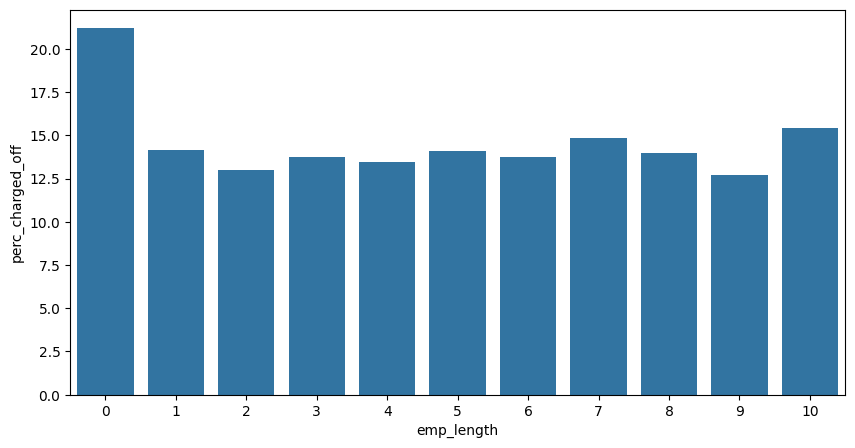

In [409]:
df_emplength=loan_df.groupby(['emp_length','loan_status'])['loan_status'].count().unstack().fillna(0).reset_index()

#plotting the graphs
df_emplength['total']=df_emplength['Charged Off']+df_emplength['Fully Paid']+df_emplength['Current']
df_emplength['perc_charged_off']=df_emplength['Charged Off']/df_emplength['total']*100
df_emplength
plt.figure(figsize=(10,5))
sns.barplot(x='emp_length',y='perc_charged_off',data=df_emplength,),
df_emplength
#customers zero to 1 year of employement length have a higher chance of charge off

#### customers zero to 1 year of employement length have a higher chance of charge off

### What is the highest range under Employement Length opened against Loan Status and Loan Amount?

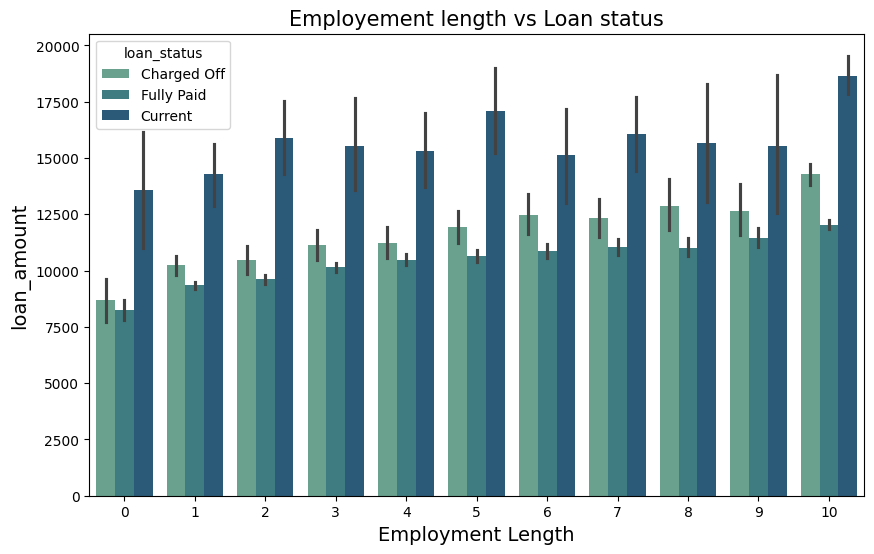

In [410]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x='emp_length',y='loan_amnt' ,hue="loan_status", data=loan_df,palette='crest')
ax.set_title('Employement length vs Loan status',fontsize=15)
ax.set_ylabel('loan_amount',fontsize=14)
ax.set_xlabel('Employment Length',fontsize=14)
plt.show()

#### The highest range under Employement Length opened against Loan Status and Loan Amount is 10th followed by 5th.

### What is the highest dept to income ratio against Loan Status?

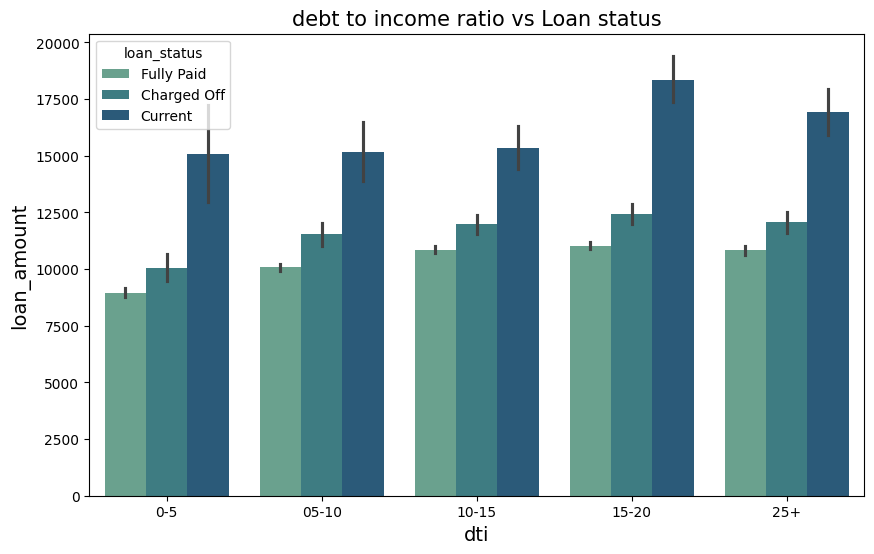

In [411]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x='dti_cats',y='loan_amnt' ,hue="loan_status", data=loan_df,palette='crest')
ax.set_title('debt to income ratio vs Loan status',fontsize=15)
ax.set_ylabel('loan_amount',fontsize=14)
ax.set_xlabel('dti',fontsize=14)
plt.show()

#### The highest dept to income ratio against Loan Status is between 15 to 20.

### What is the dept to income ratio against interest rate?

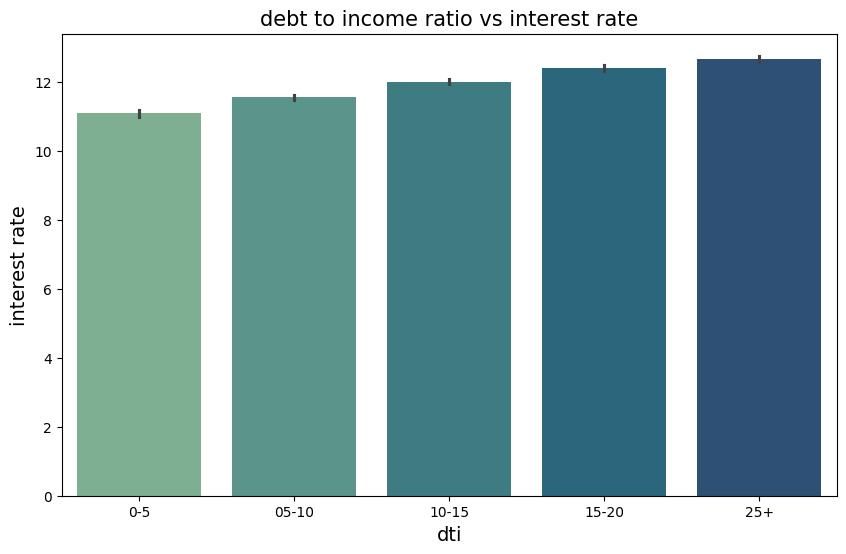

In [412]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x='dti_cats',y='int_rate' , data=loan_df,palette='crest')
ax.set_title('debt to income ratio vs interest rate',fontsize=15)
ax.set_ylabel('interest rate',fontsize=14)
ax.set_xlabel('dti',fontsize=14)
plt.show()

#### The highest dept to income ratio against interest rate is 25%+.

loan_status,dti_cats,Charged Off,Current,Fully Paid,total,perc_charged_off
0,0-5,558,79,3870,4507,12.380741
1,05-10,942,170,6304,7416,12.702265
2,10-15,1339,242,7803,9384,14.268968
3,15-20,1342,273,7169,8784,15.277778
4,25+,1100,232,5352,6684,16.457211


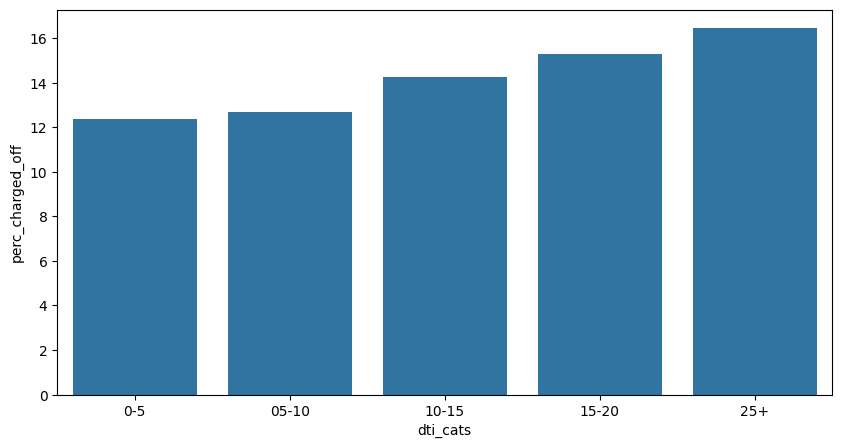

In [413]:
df_dti=loan_df.groupby(['dti_cats','loan_status'])['loan_status'].count().unstack().fillna(0).reset_index()

#plotting the graphs
df_dti['total']=df_dti['Charged Off']+df_dti['Fully Paid']+df_dti['Current']
df_dti['perc_charged_off']=df_dti['Charged Off']/df_dti['total']*100
df_dti
plt.figure(figsize=(10,5))
sns.barplot(x='dti_cats',y='perc_charged_off',data=df_dti),
df_dti
#customers with  higher DTI ratio that is above 15 have higher chance off

<Axes: xlabel='dti', ylabel='purpose'>

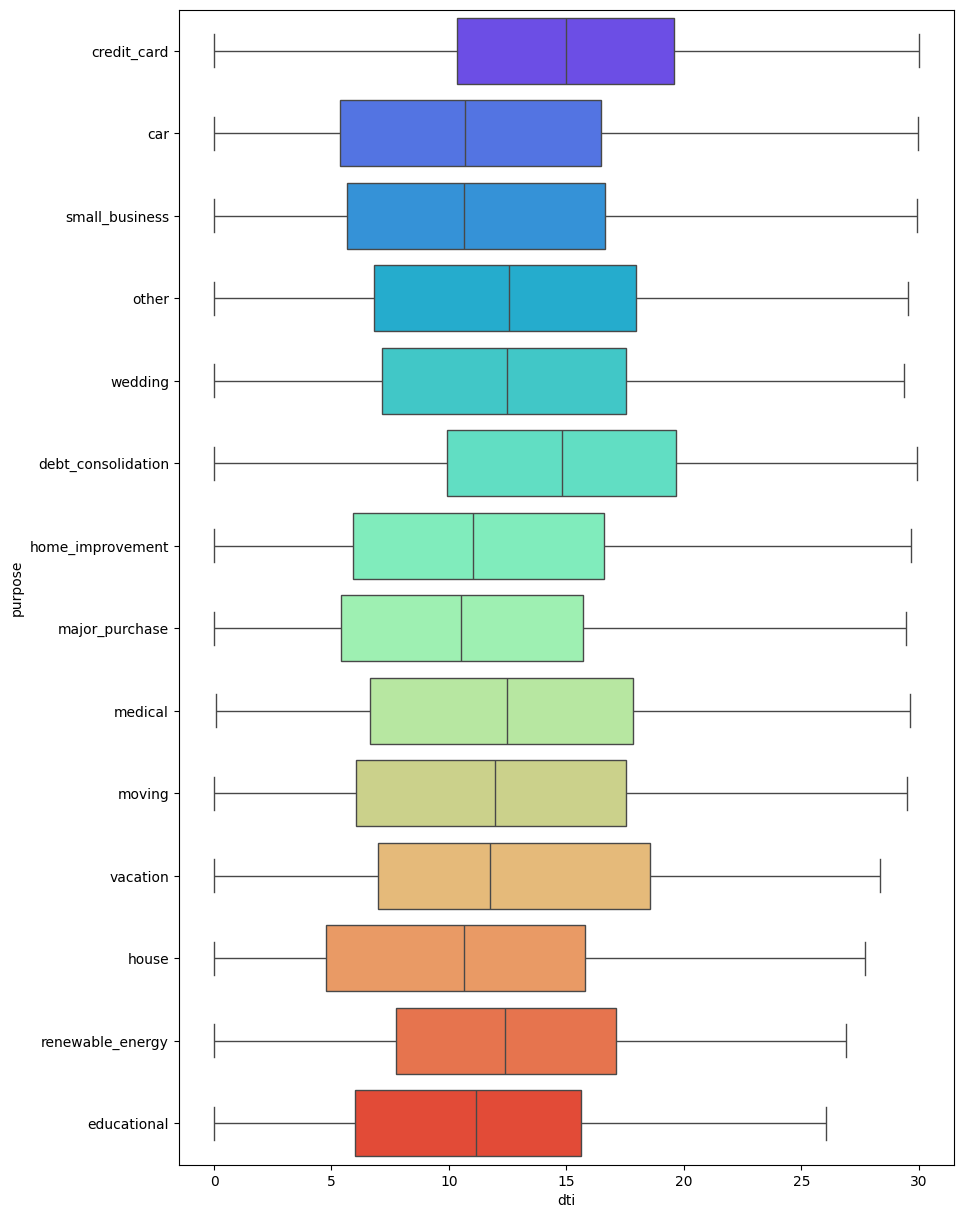

In [414]:
plt.figure(figsize=(10,15))
sns.boxplot(x='dti',y='purpose',data=loan_df,palette='rainbow')
#Customers who havw taken loans for Credit card and debt consolidation purpose have higer average DTI ratio

#### Customers who havw taken loans for Credit card and debt consolidation purpose have higer average DTI ratio

<Axes: xlabel='annual_inc', ylabel='purpose'>

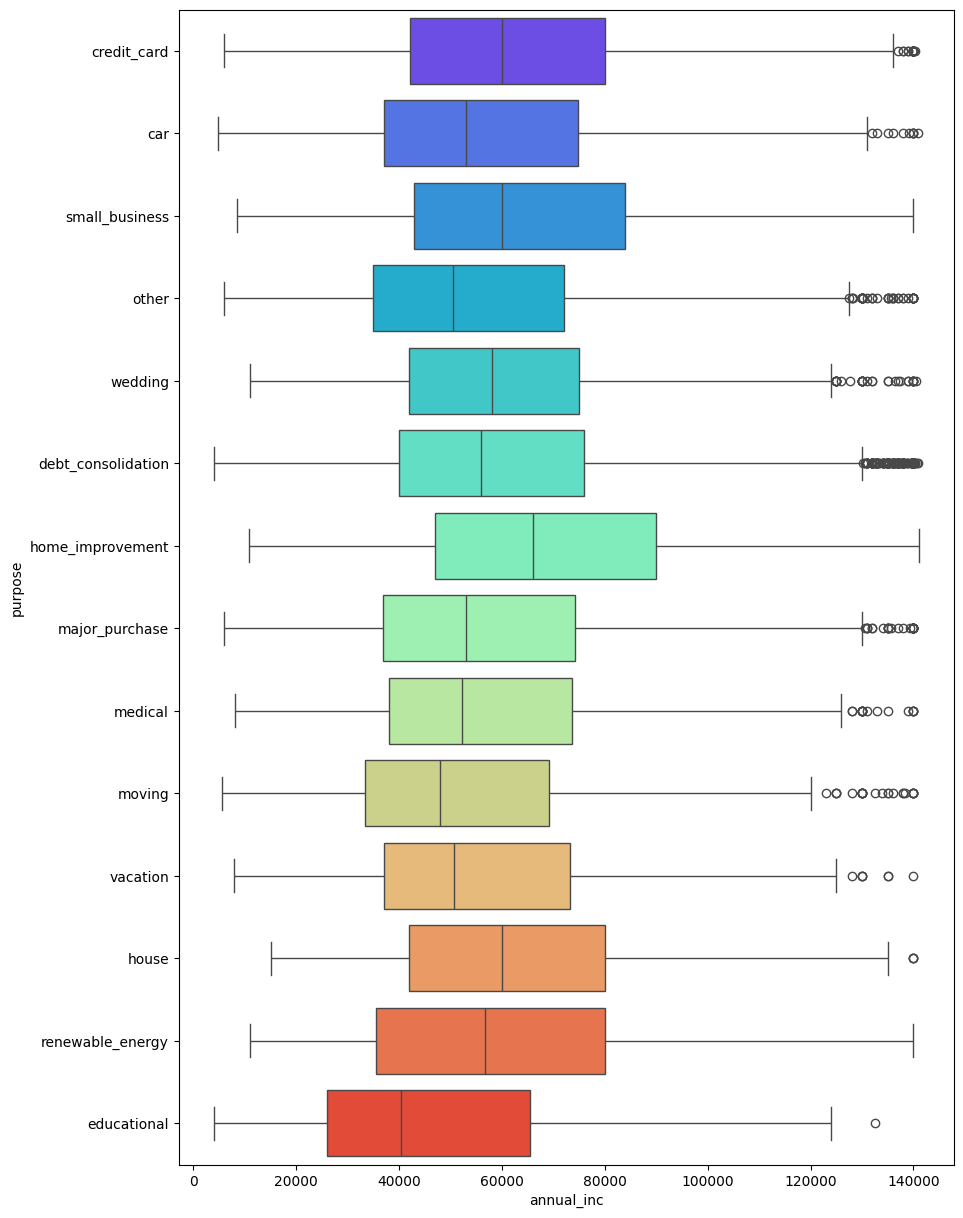

In [415]:
#checking if annual income and purpose to see if there's any relation between them
plt.figure(figsize=(10,15))
sns.boxplot(x='annual_inc',y='purpose',data=loan_df,palette='rainbow')
#average annual income for the customers who are takng loan for small business is low may be that's the reason we see more charge in this segment

In [416]:
loan_df.groupby(['annual_inc_cats','term','loan_status'])['loan_status'].count().unstack().fillna(0).reset_index()

loan_status,annual_inc_cats,term,Charged Off,Current,Fully Paid
0,0-20000,36 months,183,0,833
1,0-20000,60 months,50,9,94
2,20000-40000,36 months,972,0,5847
3,20000-40000,60 months,531,170,1133
4,40000-60000,36 months,969,0,7487
5,40000-60000,60 months,756,345,2031
6,60000-80000,36 months,519,0,5053
7,60000-80000,60 months,502,240,1533
8,80000 +,36 months,453,0,5311
9,80000 +,60 months,460,290,1840
